In [ ]:
#heart failure prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('heart_failure_clinical_records.csv')


In [ ]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [ ]:
df.shape


(5000, 13)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.duplicated().sum()

3680

In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
df.nunique()

,0
age,48
anaemia,2
creatinine_phosphokinase,290
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,203
serum_creatinine,43
serum_sodium,27
sex,2


In [ ]:
object_columns=df.select_dtypes(include=['object']).columns
print("object type columns:")
print(object_columns)
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print("\nnumerical type columns:")
print(numerical_columns)

object type columns:
Index([], dtype='object')

numerical type columns:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features


In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Continuous Features: ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

anaemia
[0 1]

diabetes
[0 1]

high_blood_pressure
[0 1]

sex
[1 0]

smoking
[1 0]

DEATH_EVENT
[0 1]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

anaemia
0    2628
1    2372
Name: count, dtype: int64

diabetes
0    2803
1    2197
Name: count, dtype: int64

high_blood_pressure
0    3176
1    1824
Name: count, dtype: int64

sex
1    3228
0    1772
Name: count, dtype: int64

smoking
0    3441
1    1559
Name: count, dtype: int64

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64



In [ ]:
df_new = df.copy()

In [ ]:
df_new = df_new.drop_duplicates()

In [ ]:
for i in discrete:
    print(df_new[i].value_counts())
    print()

anaemia
0    679
1    641
Name: count, dtype: int64

diabetes
0    730
1    590
Name: count, dtype: int64

high_blood_pressure
0    832
1    488
Name: count, dtype: int64

sex
1    852
0    468
Name: count, dtype: int64

smoking
0    914
1    406
Name: count, dtype: int64

DEATH_EVENT
0    923
1    397
Name: count, dtype: int64



In [ ]:
df = df.drop_duplicates()

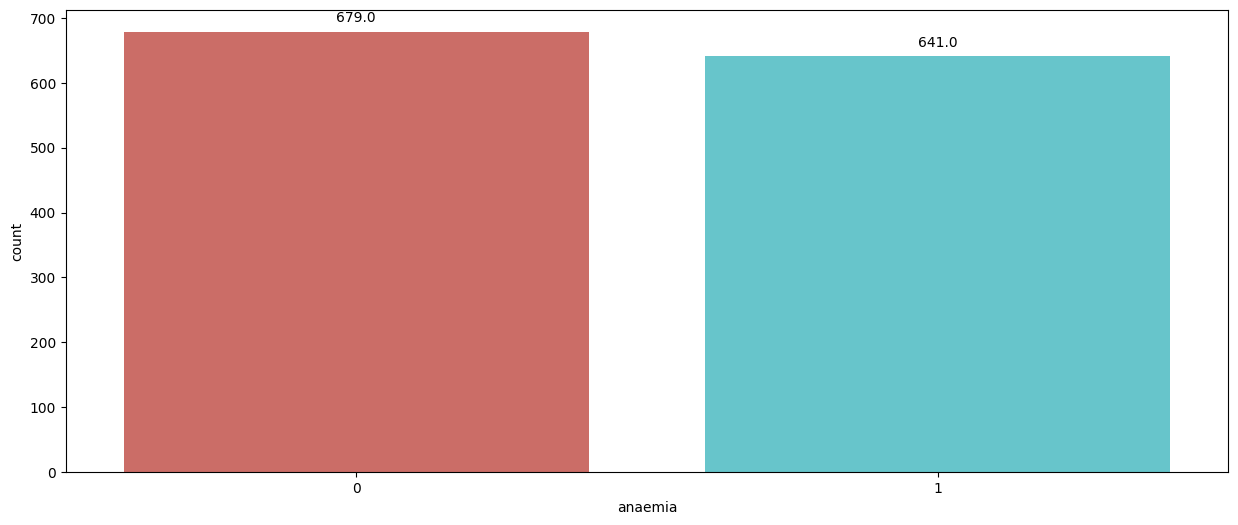

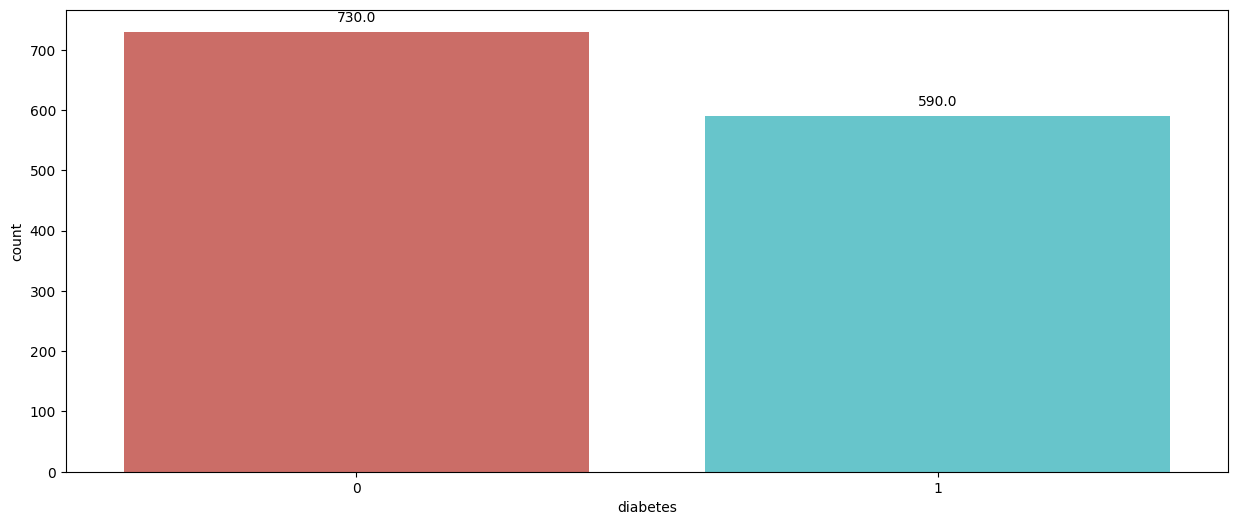

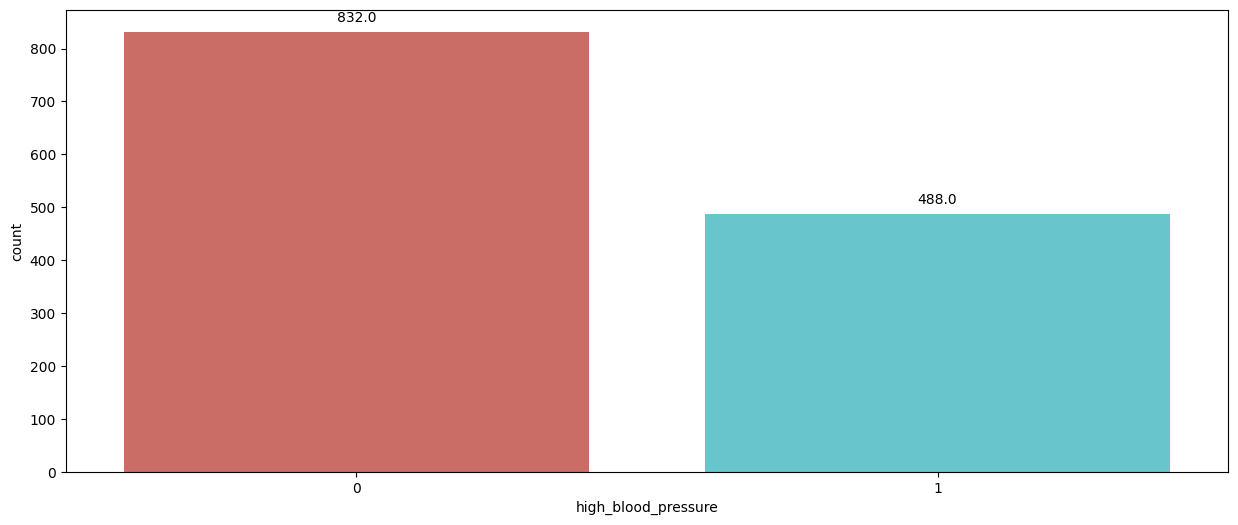

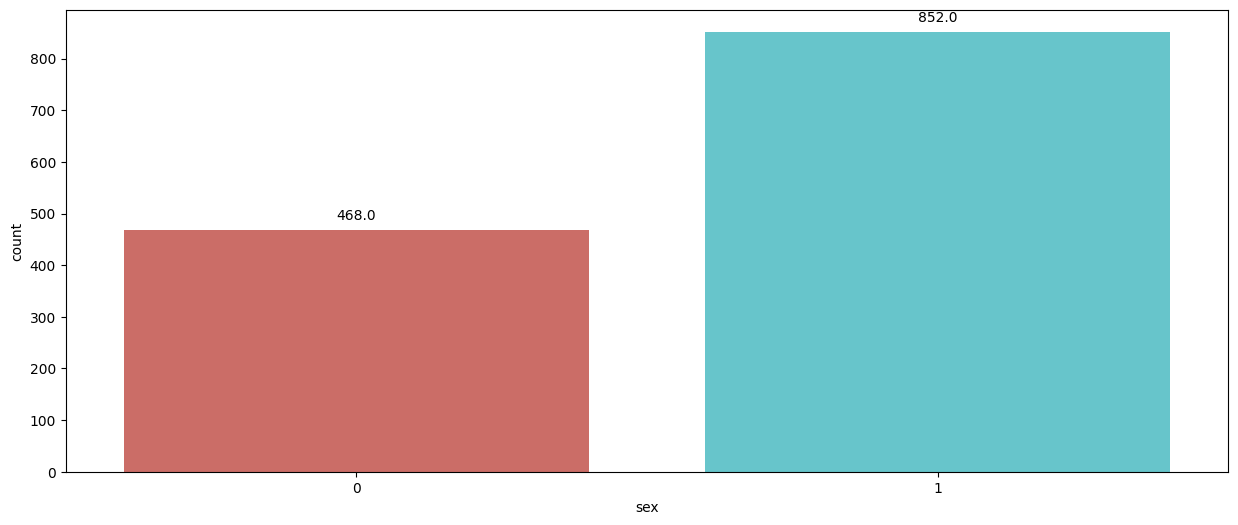

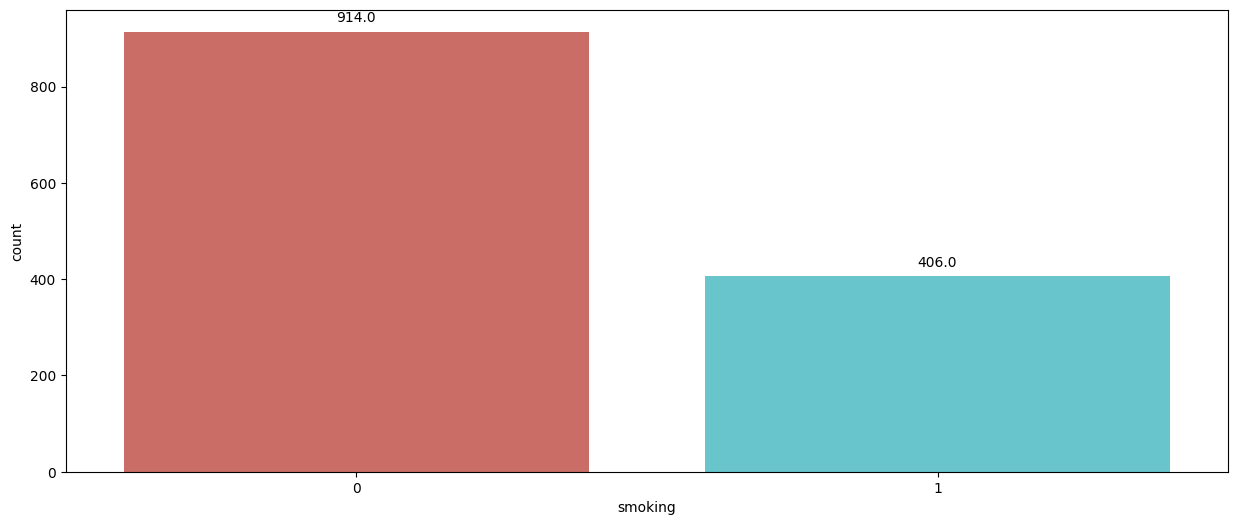

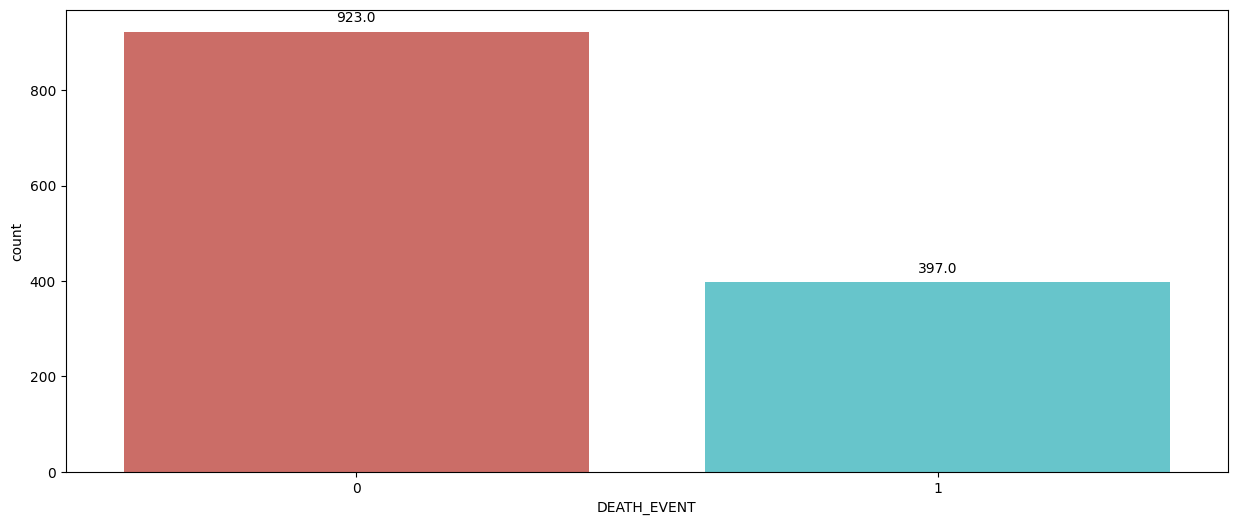

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

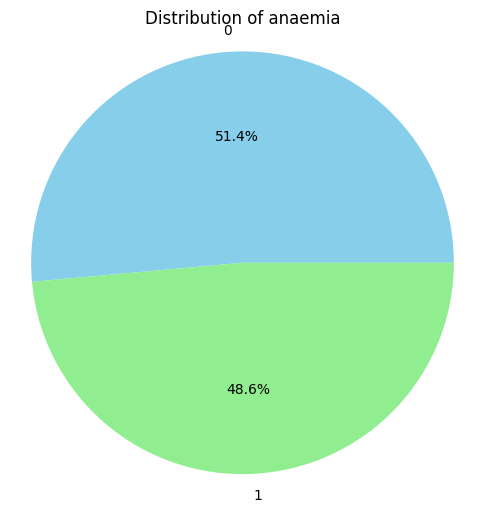

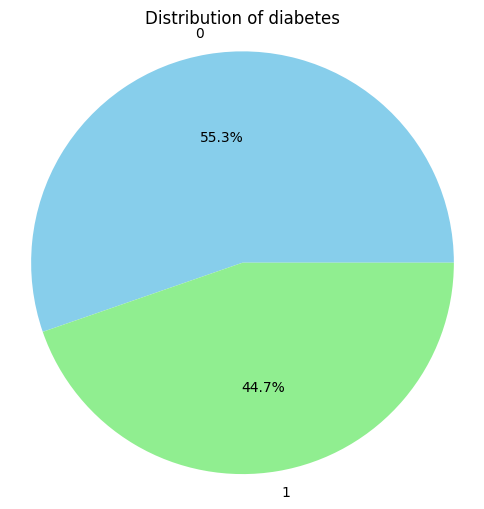

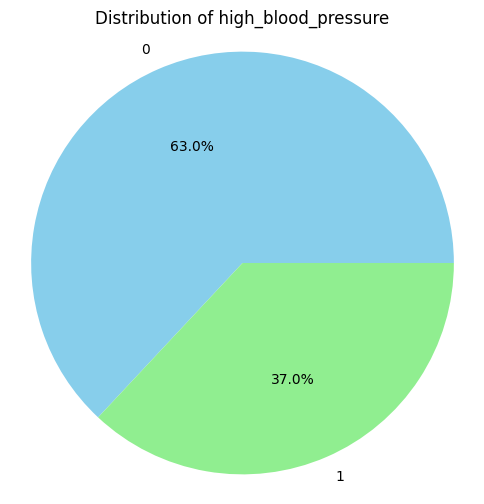

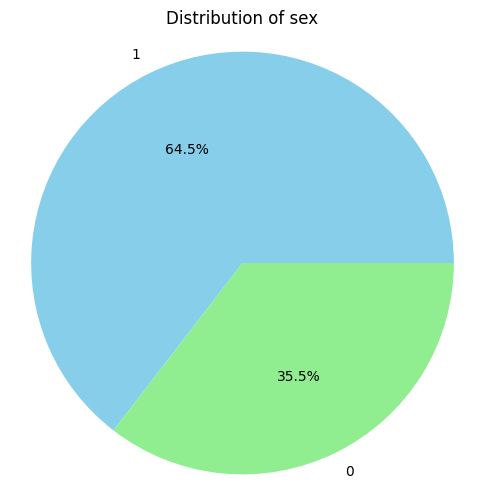

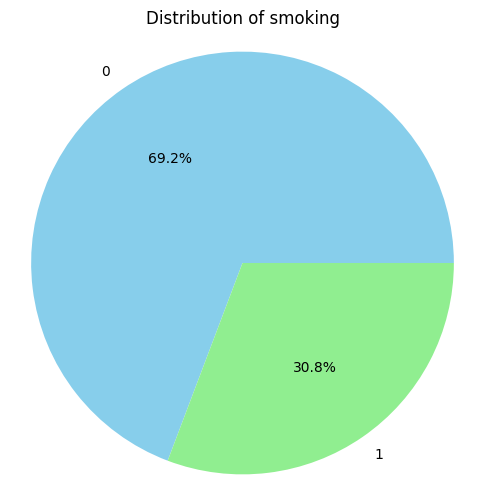

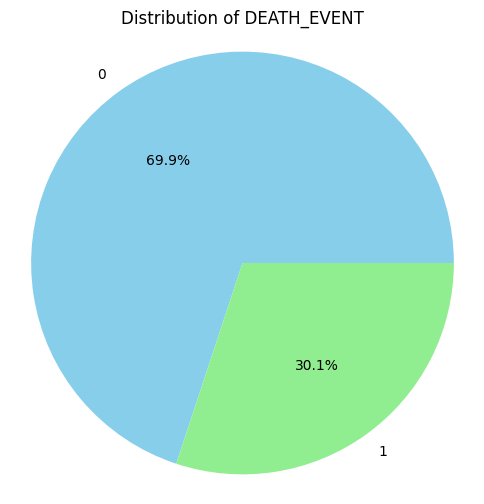

In [ ]:
for i in discrete:
    plt.figure(figsize=(6,6))
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')
    plt.show()

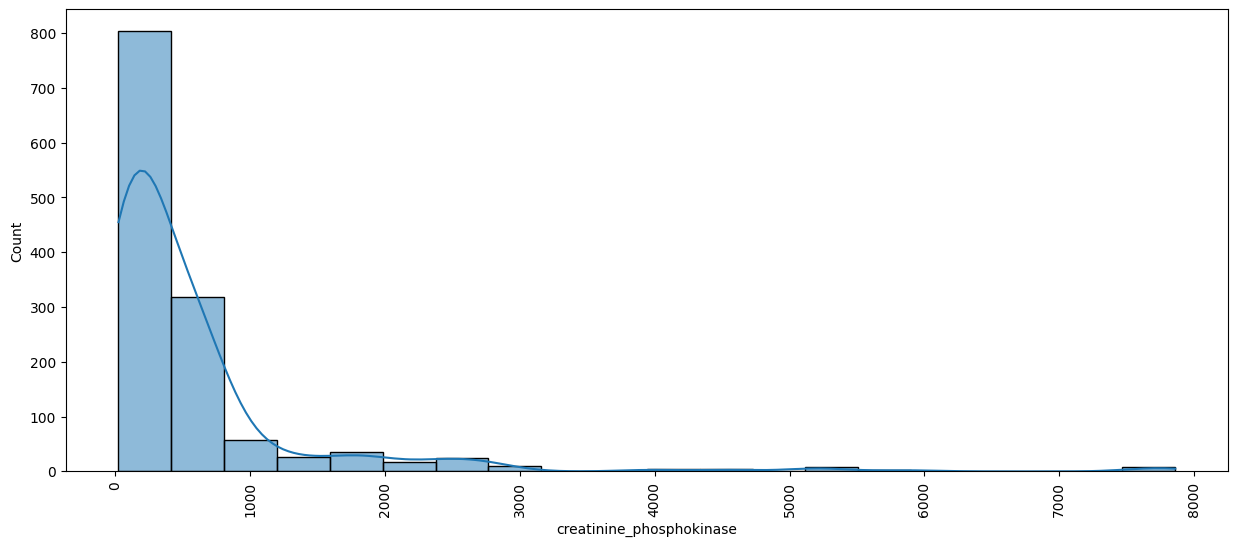

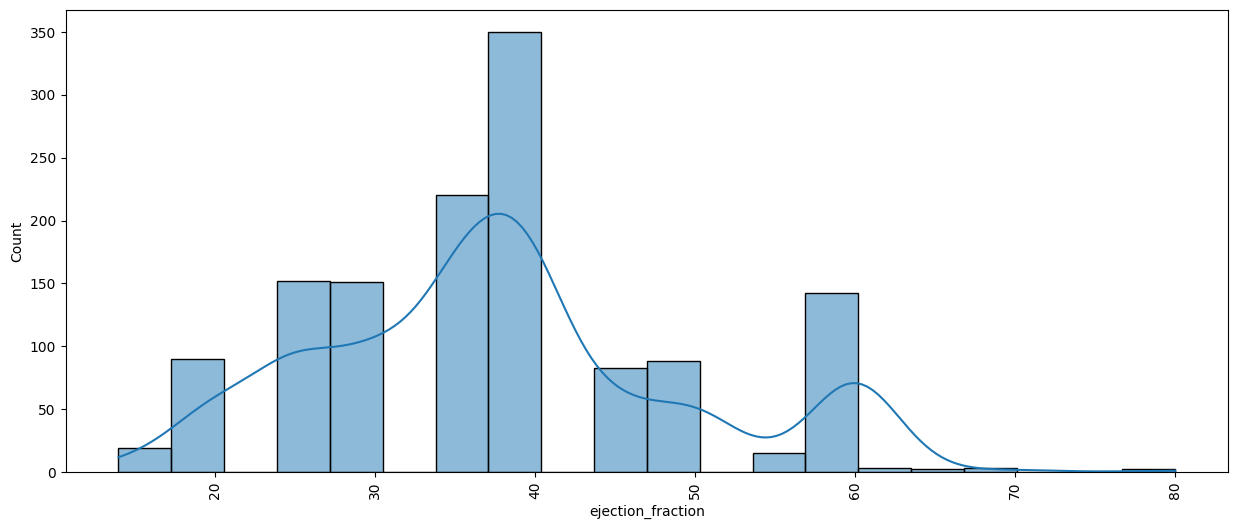

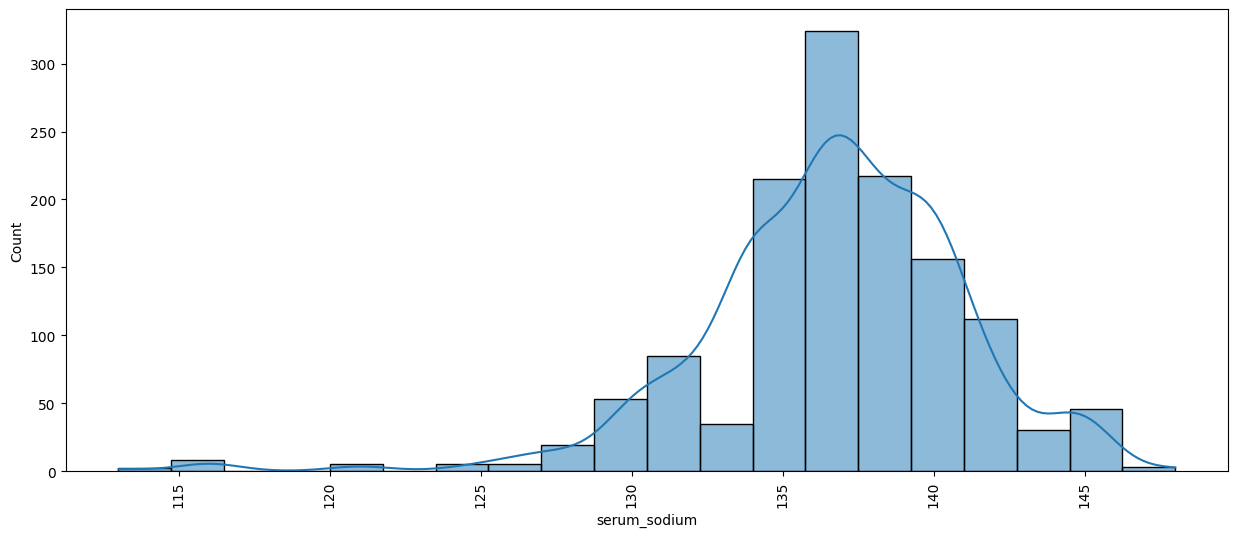

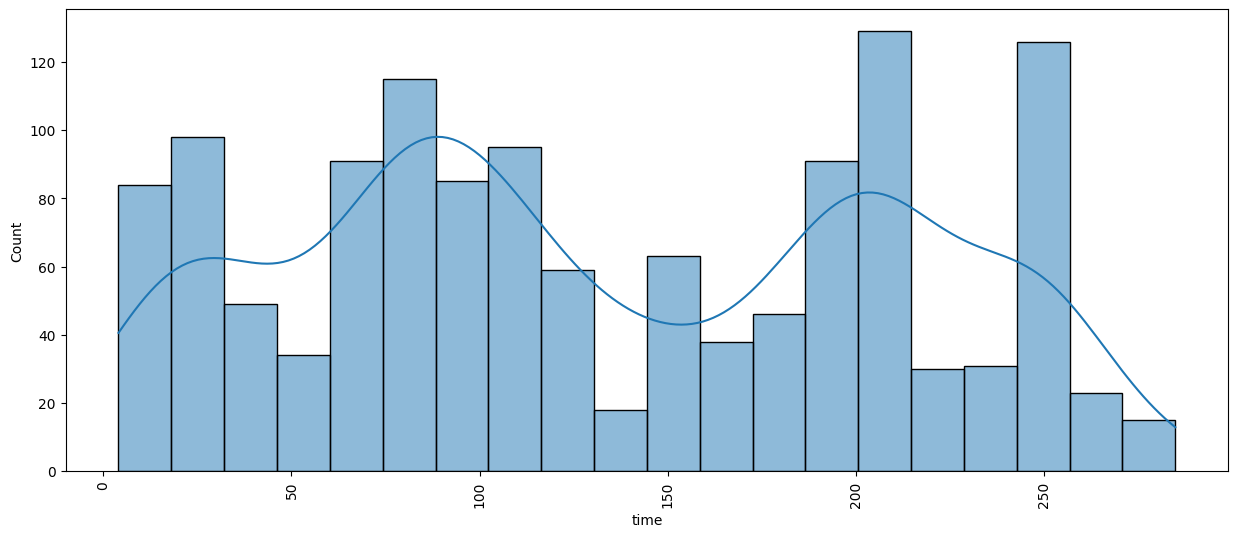

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

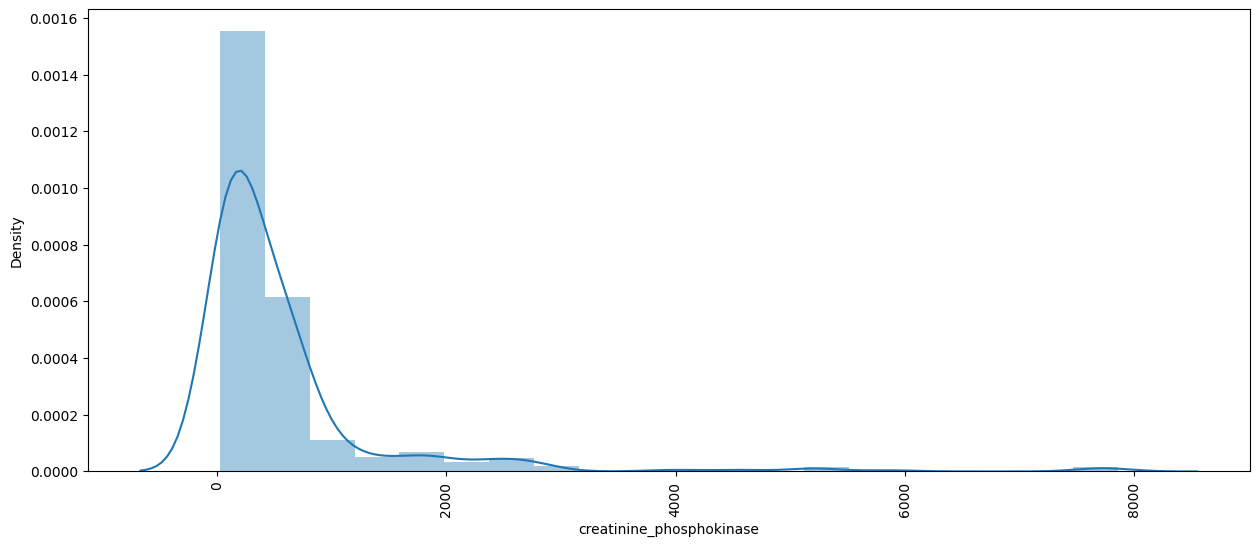

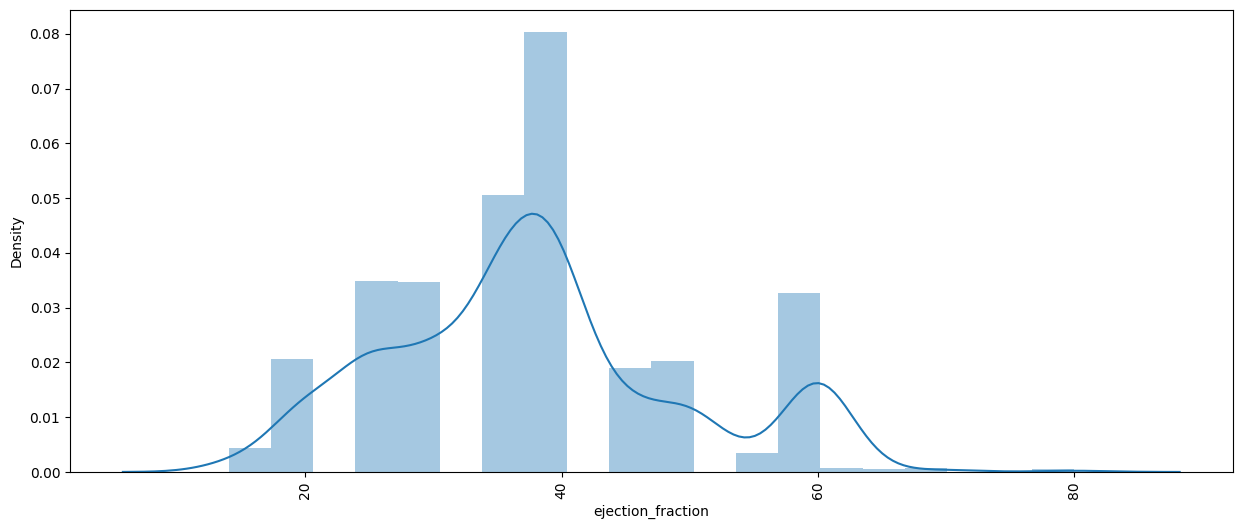

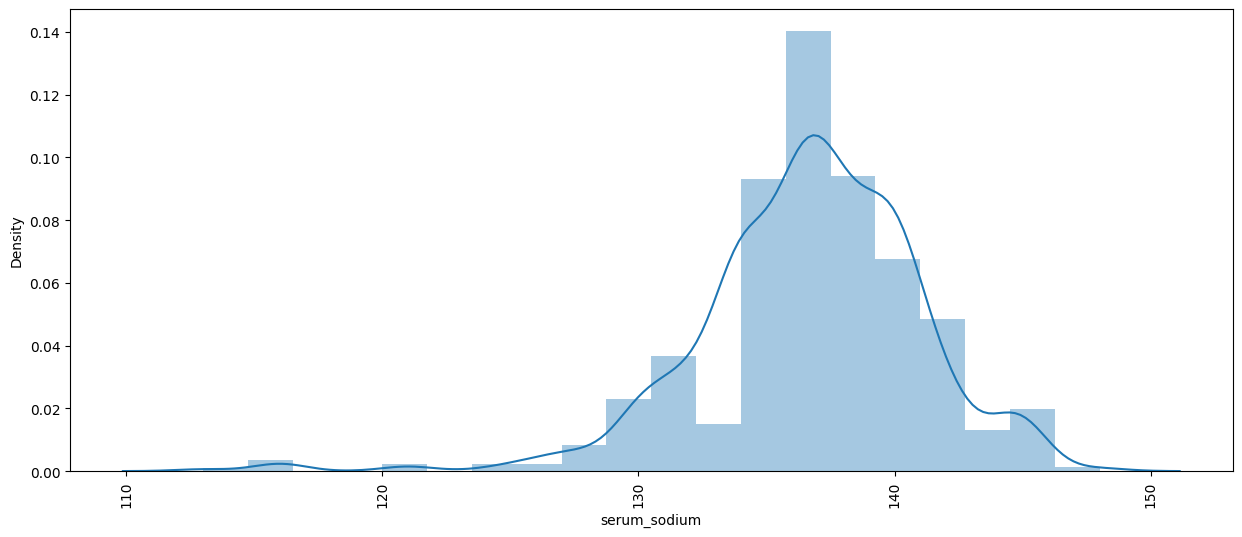

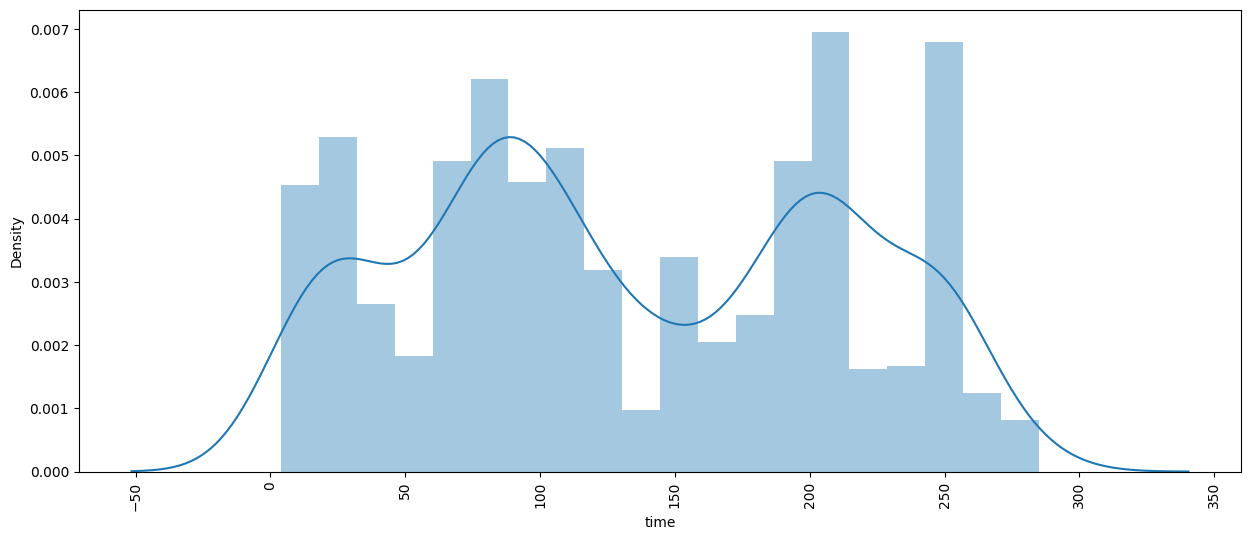

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

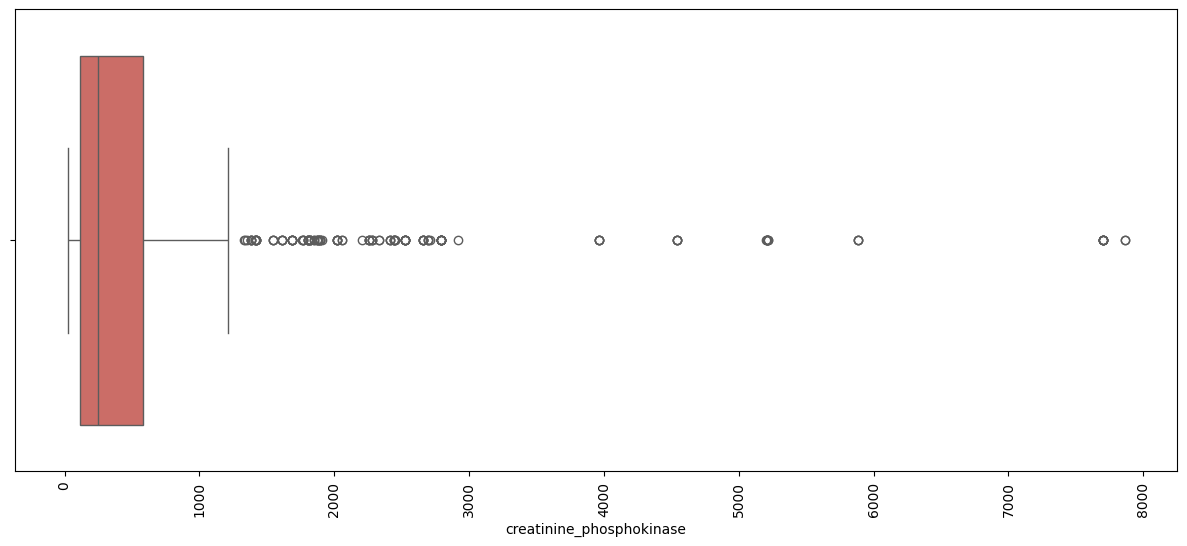

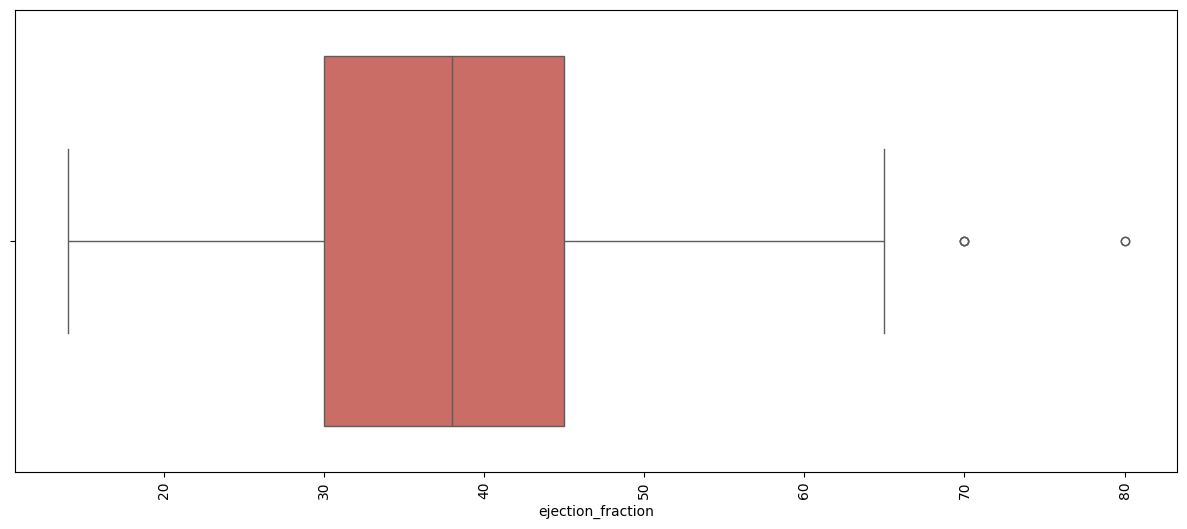

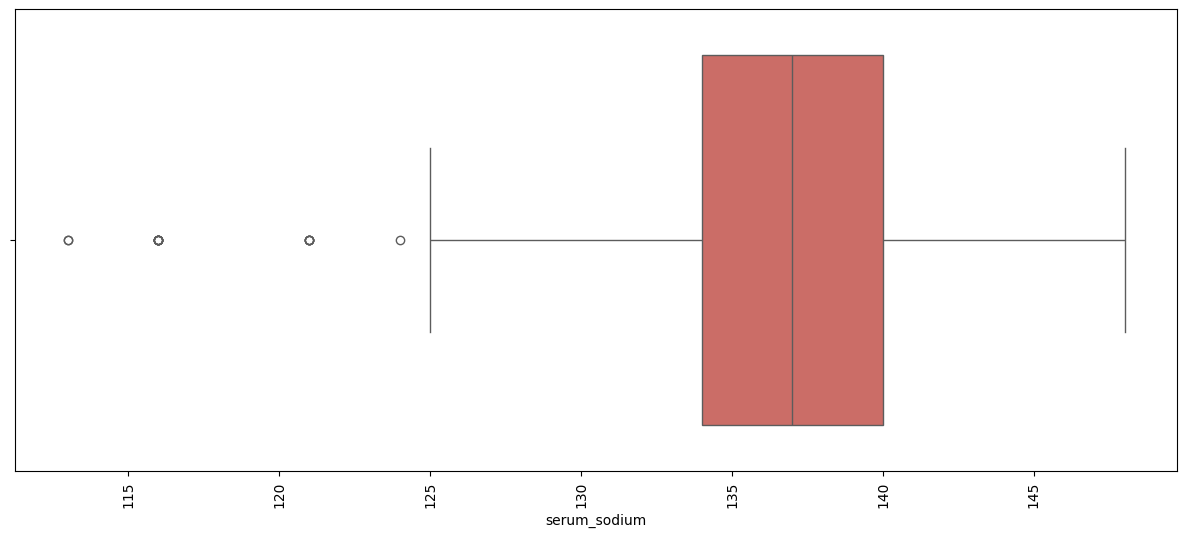

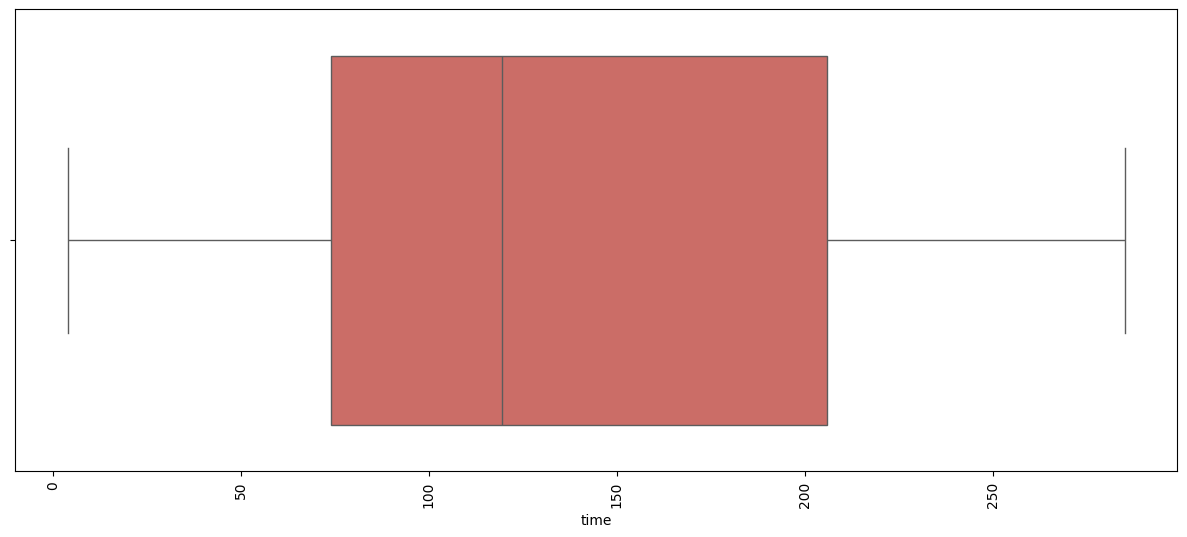

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

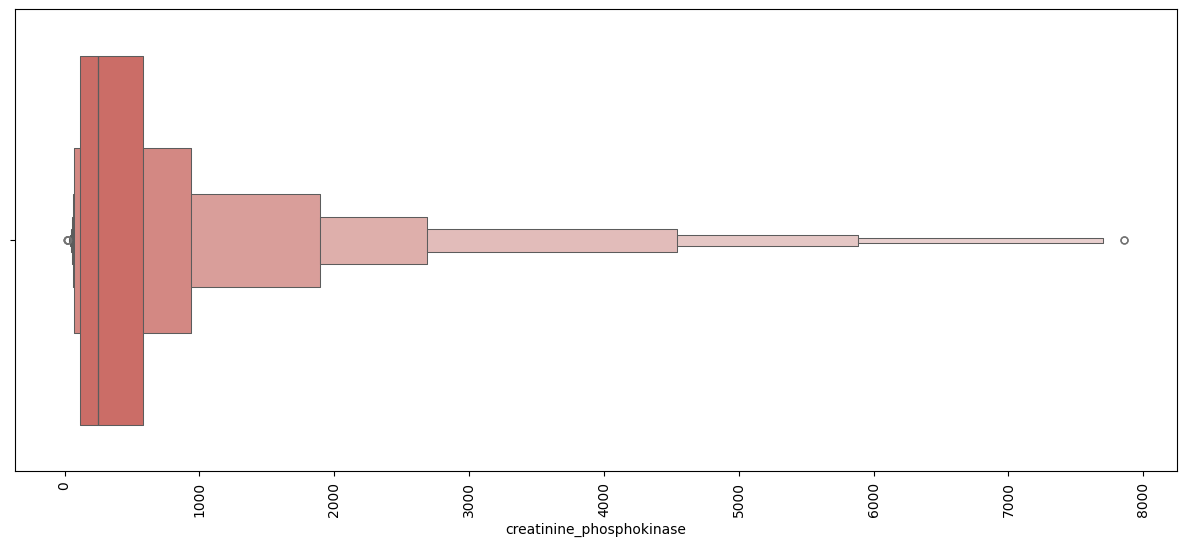

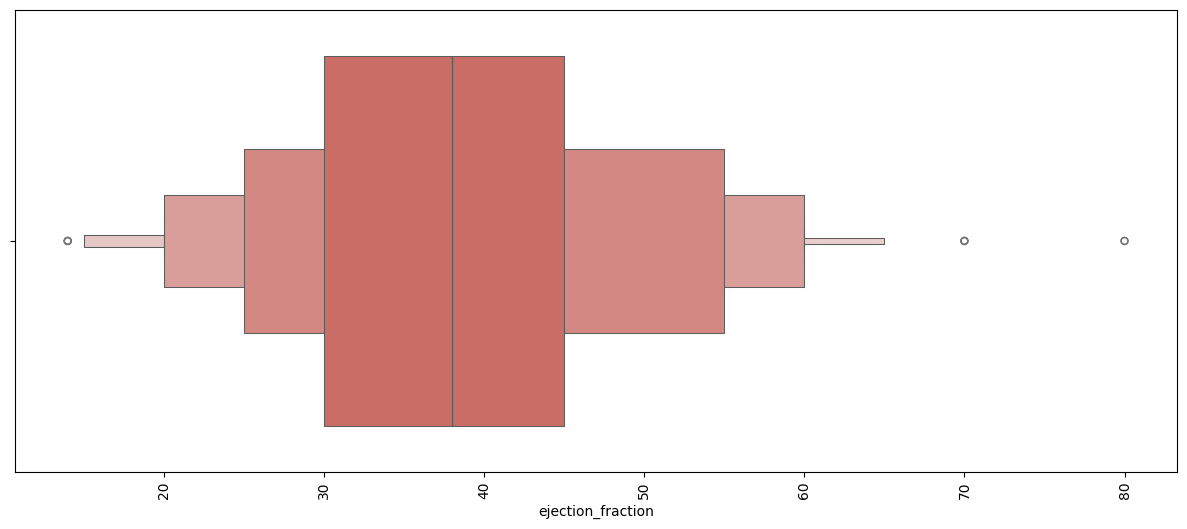

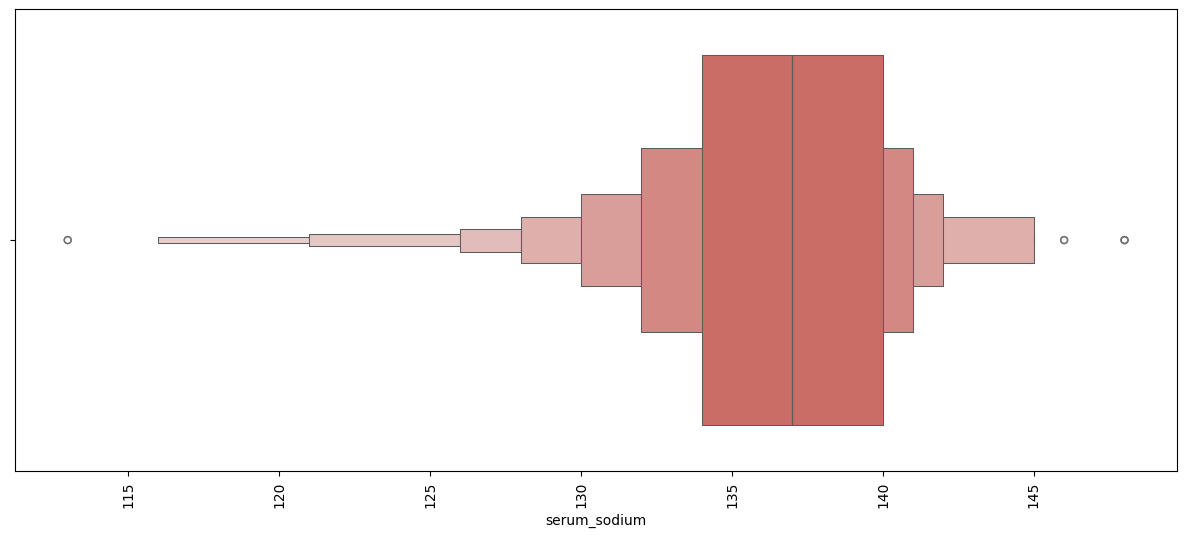

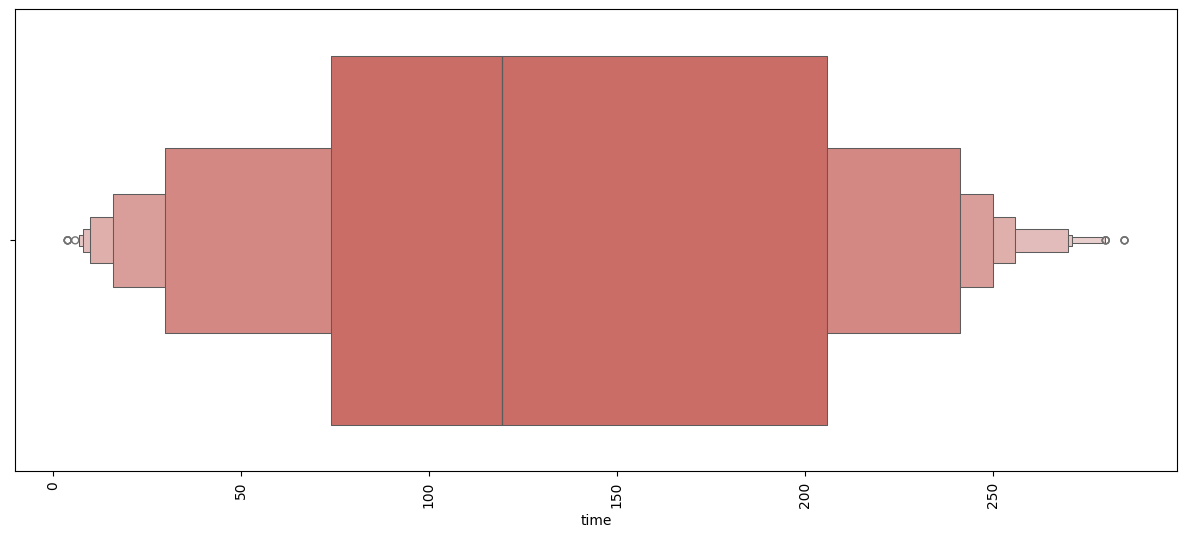

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

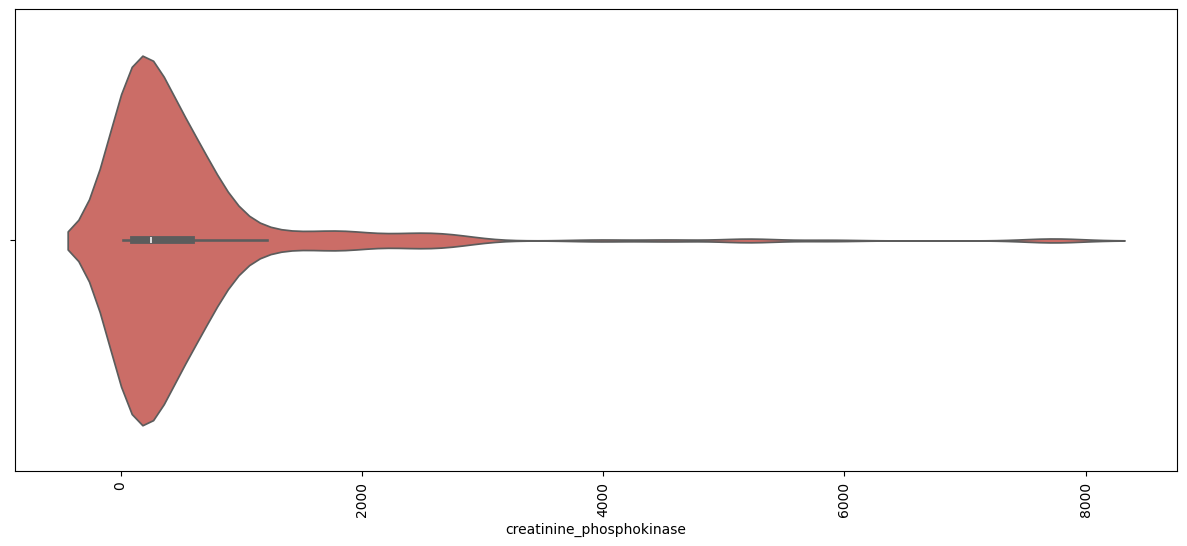

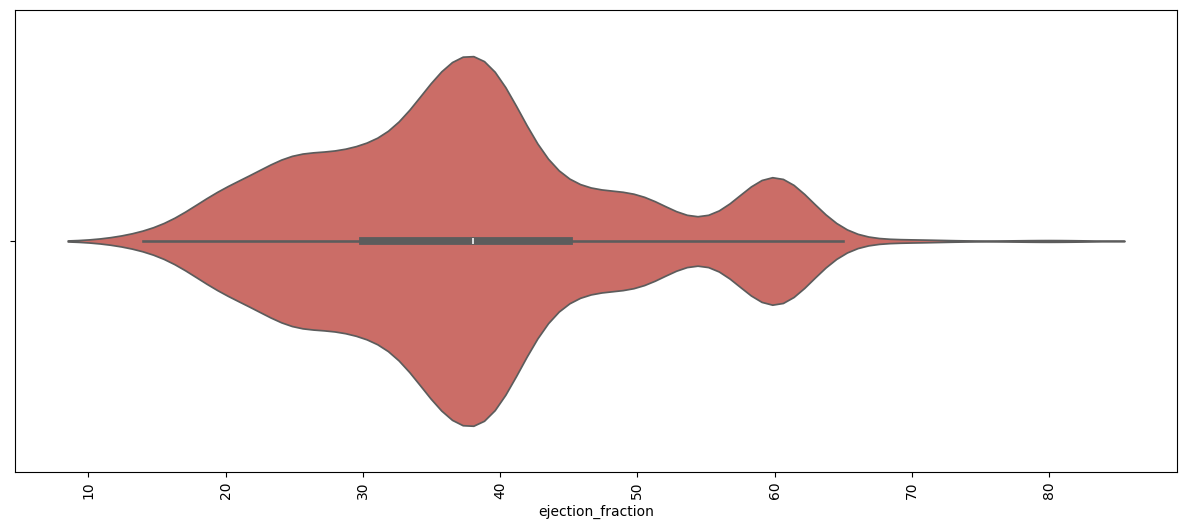

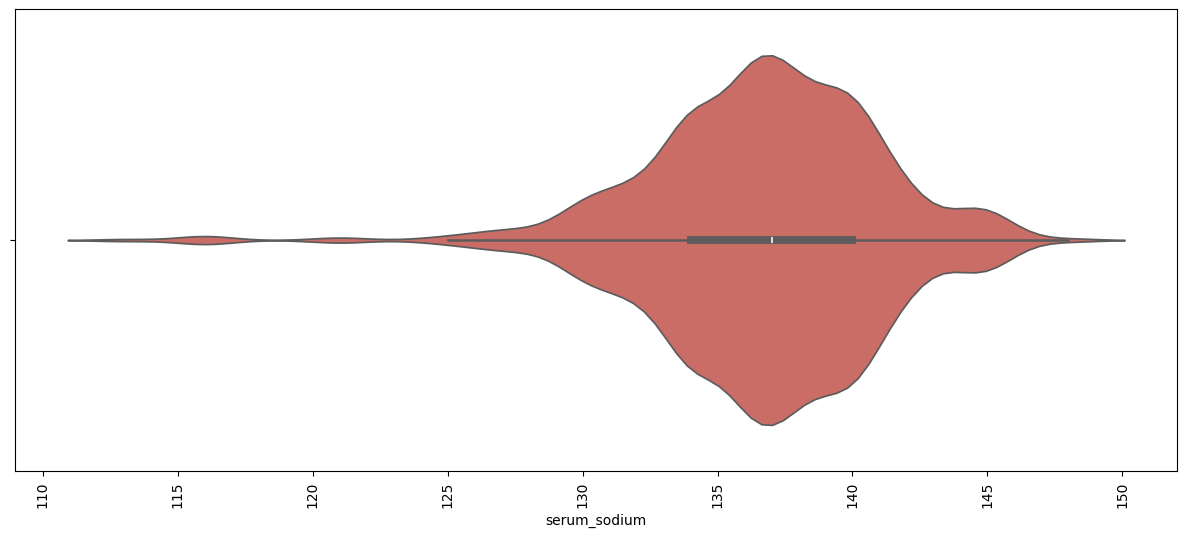

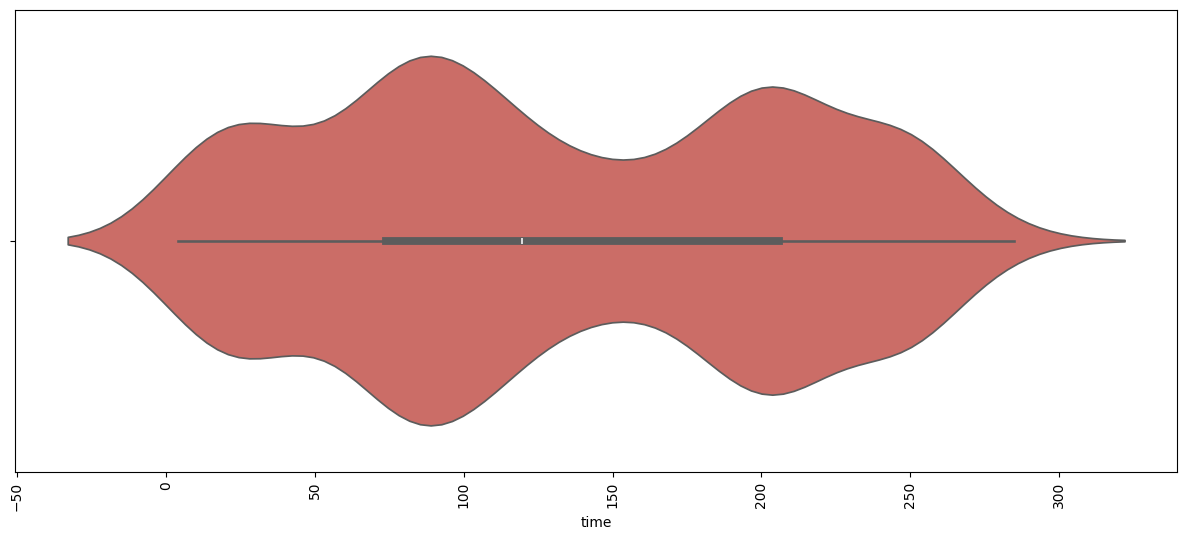

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
categorical_features = []
non_categorical_features = []
discrete_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
continuous_features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']
target = 'DEATH_EVENT'

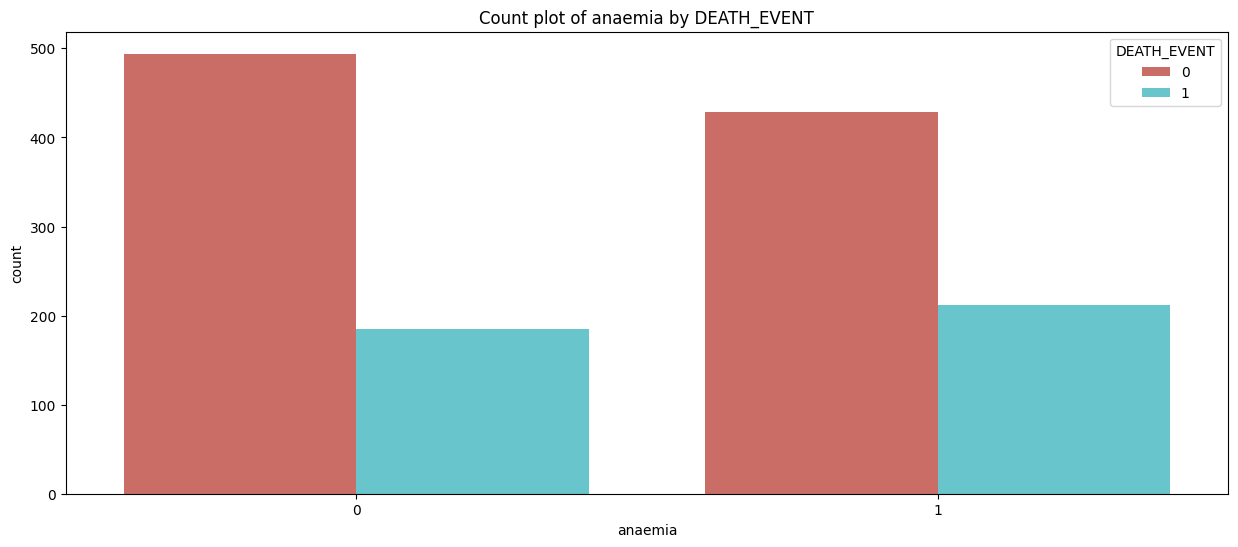

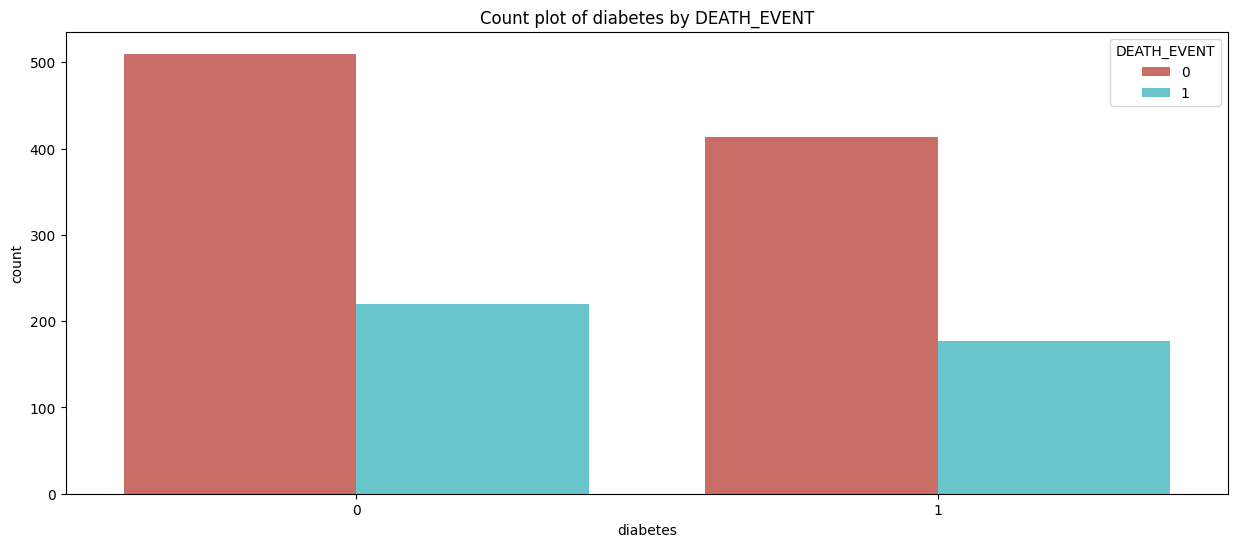

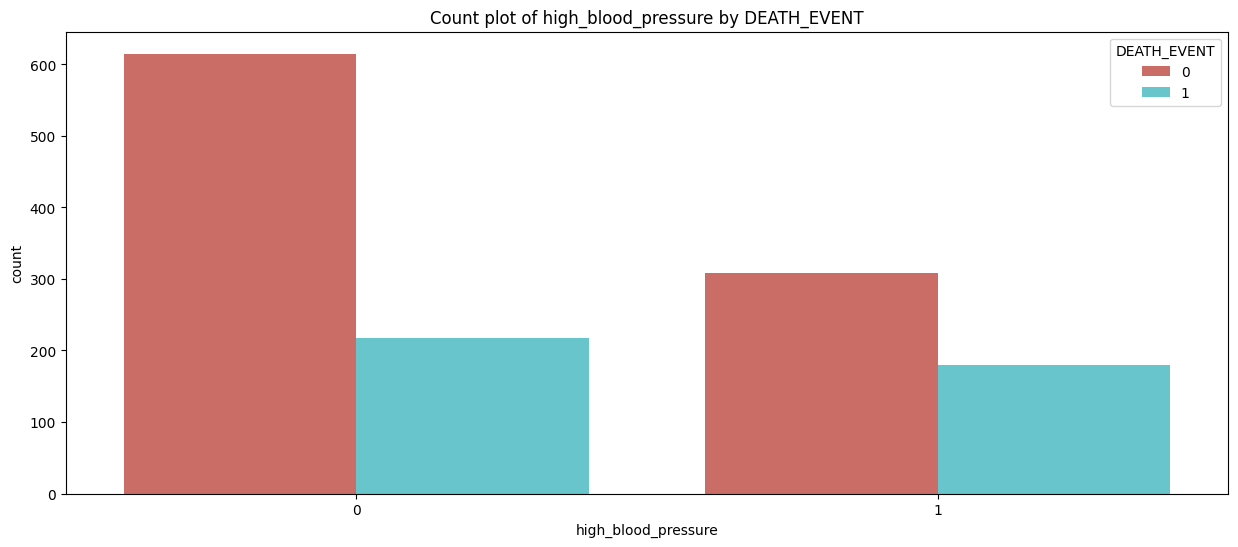

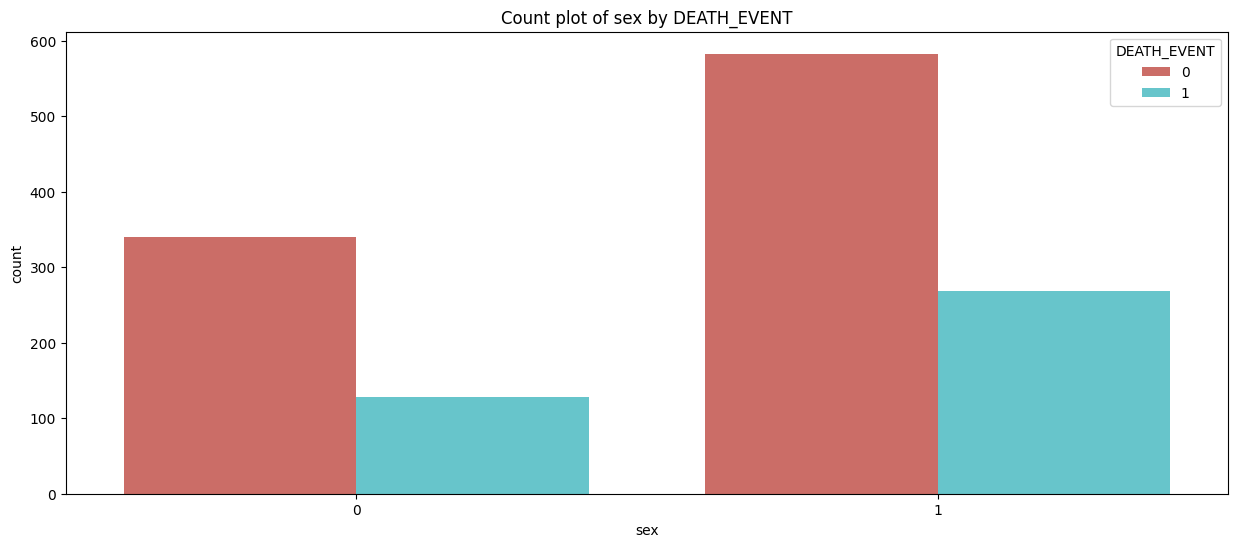

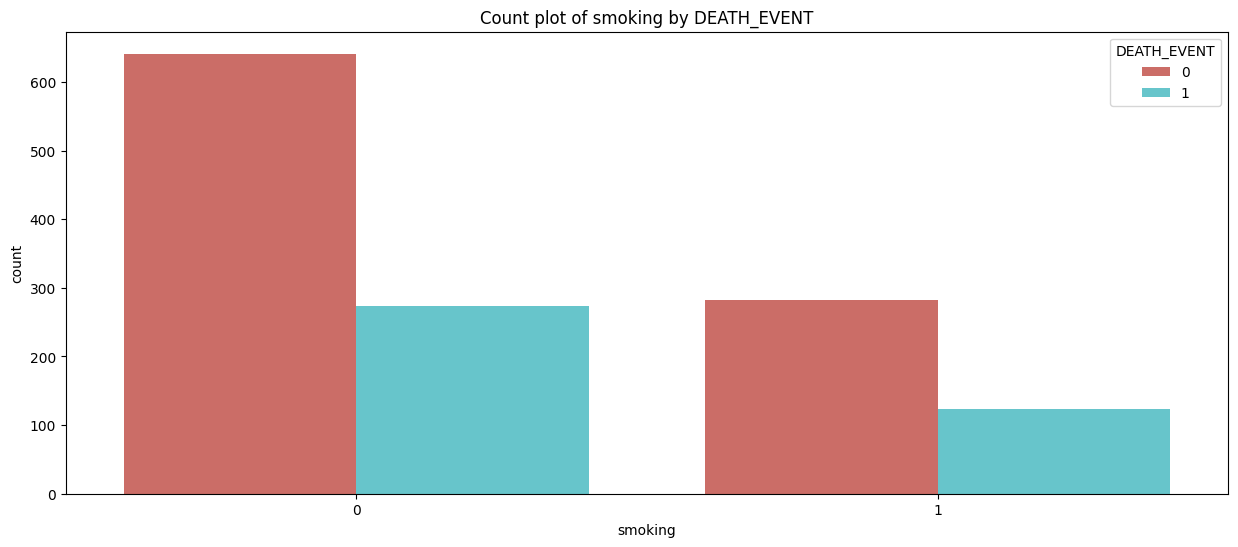

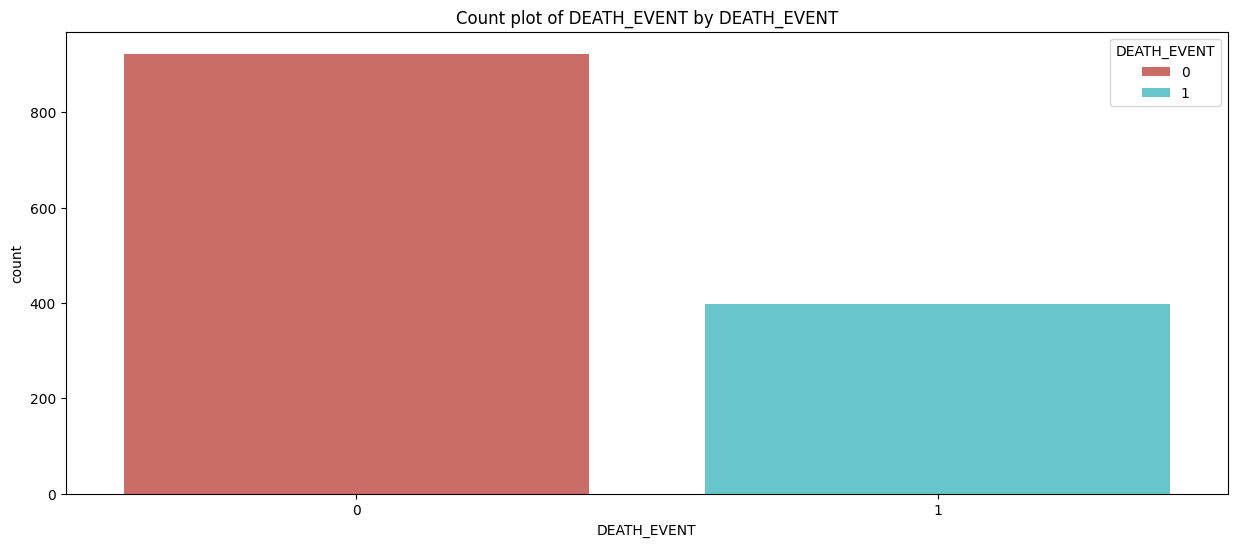

In [ ]:
for feature in discrete_features:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=feature, hue=target, data=df, palette='hls')
    plt.title(f'Count plot of {feature} by {target}')
    plt.show()

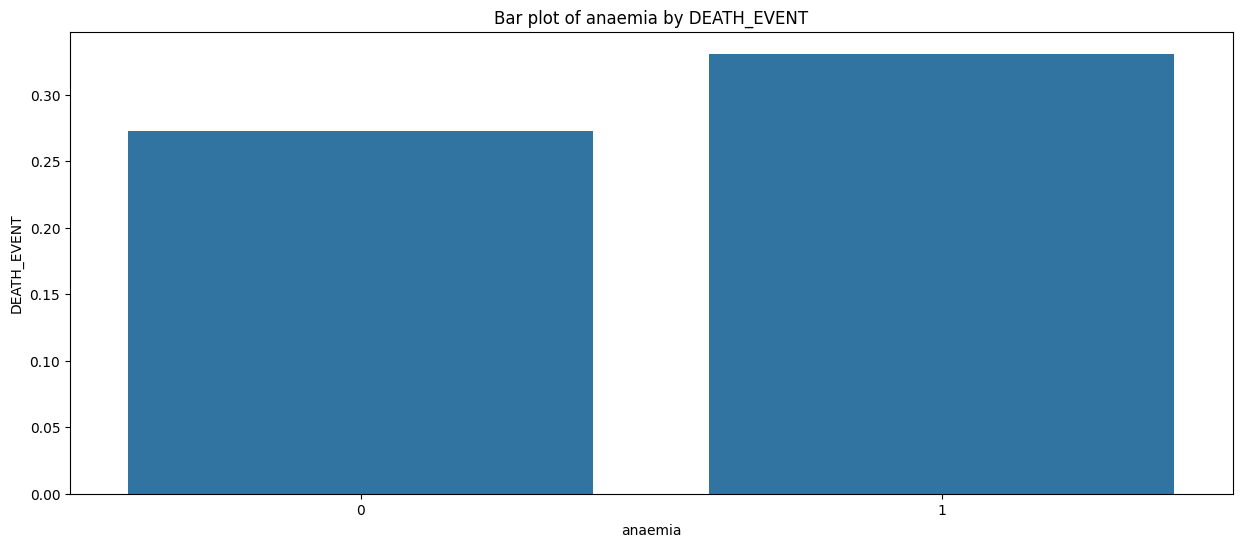

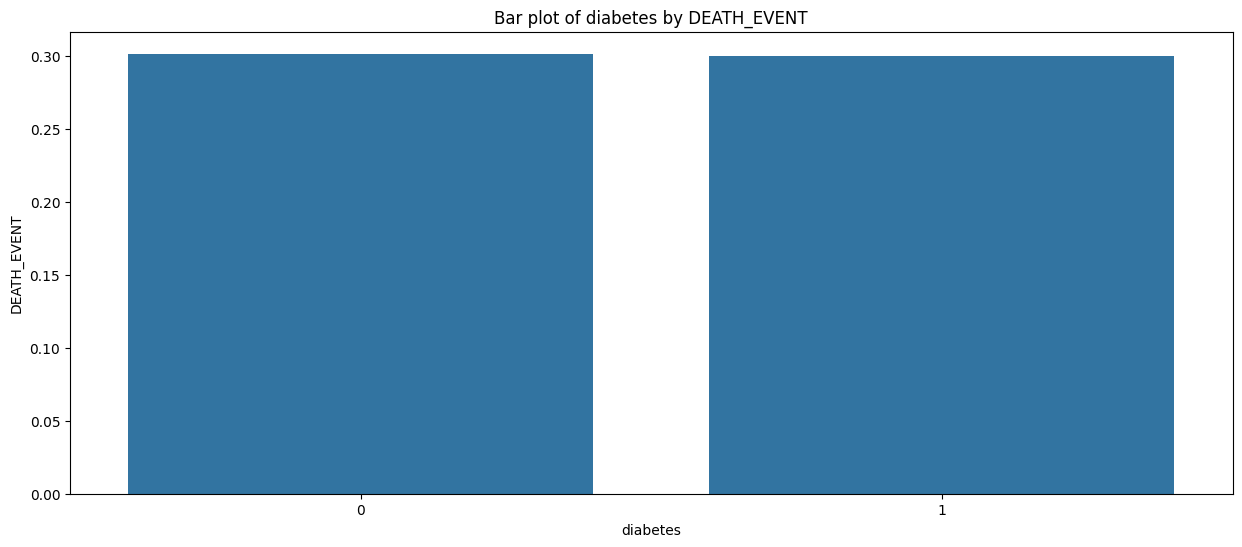

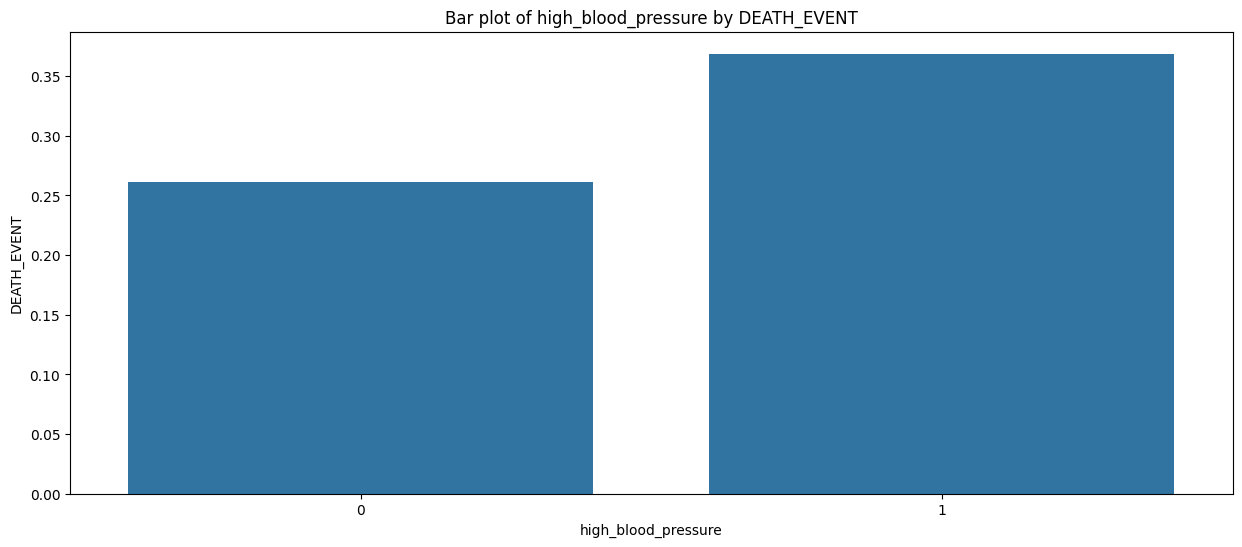

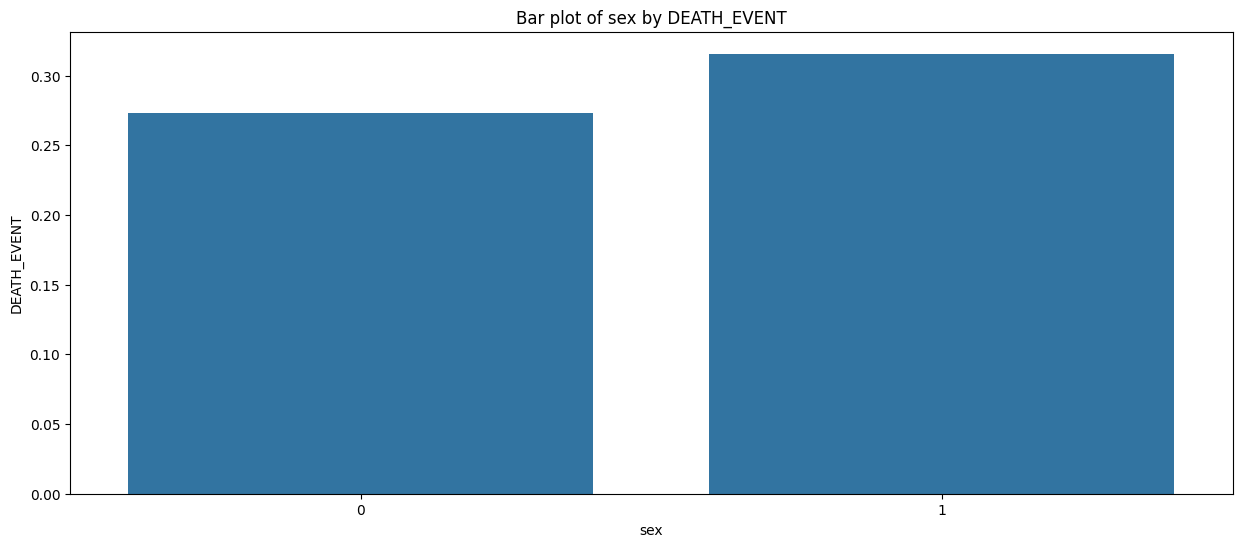

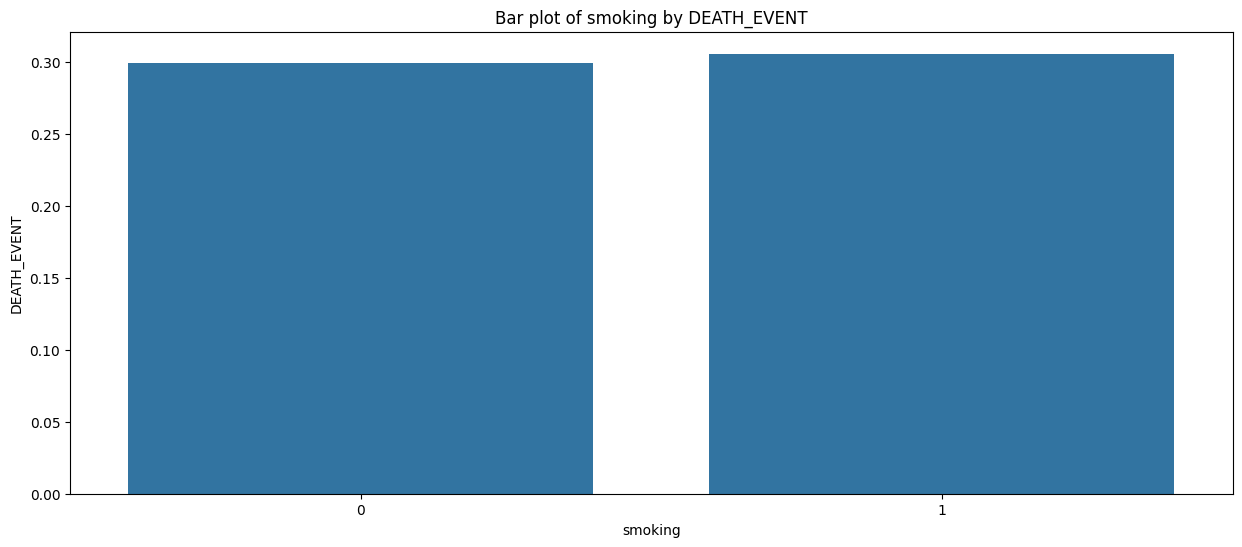

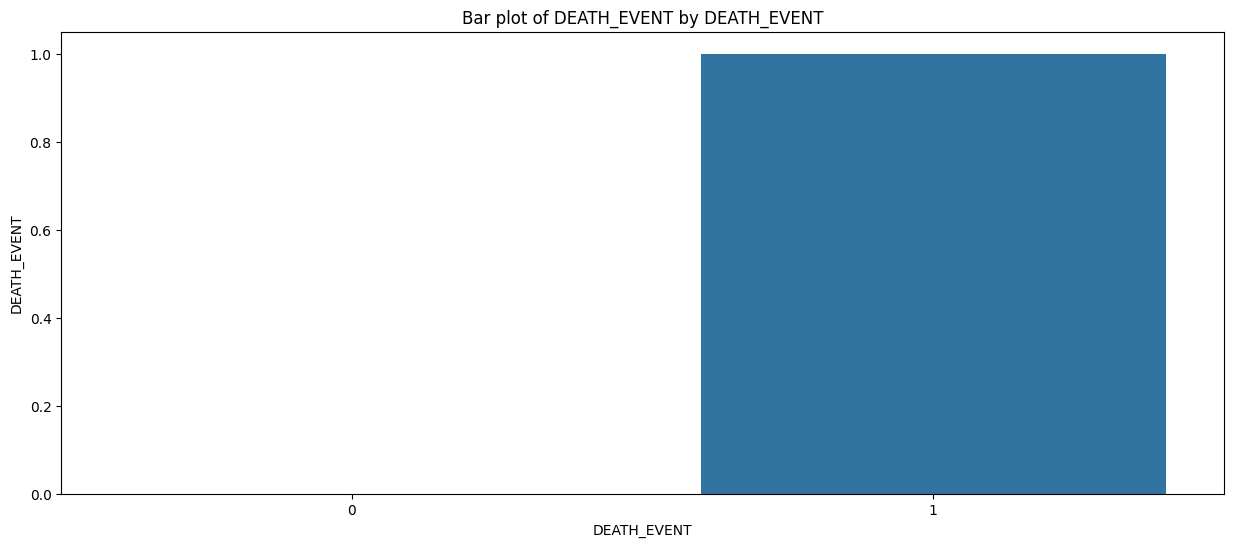

In [ ]:
for feature in discrete_features:
    plt.figure(figsize=(15, 6))
    sns.barplot(y=target, x=feature, ci = None, data=df)
    plt.title(f'Bar plot of {feature} by {target}')
    plt.show()

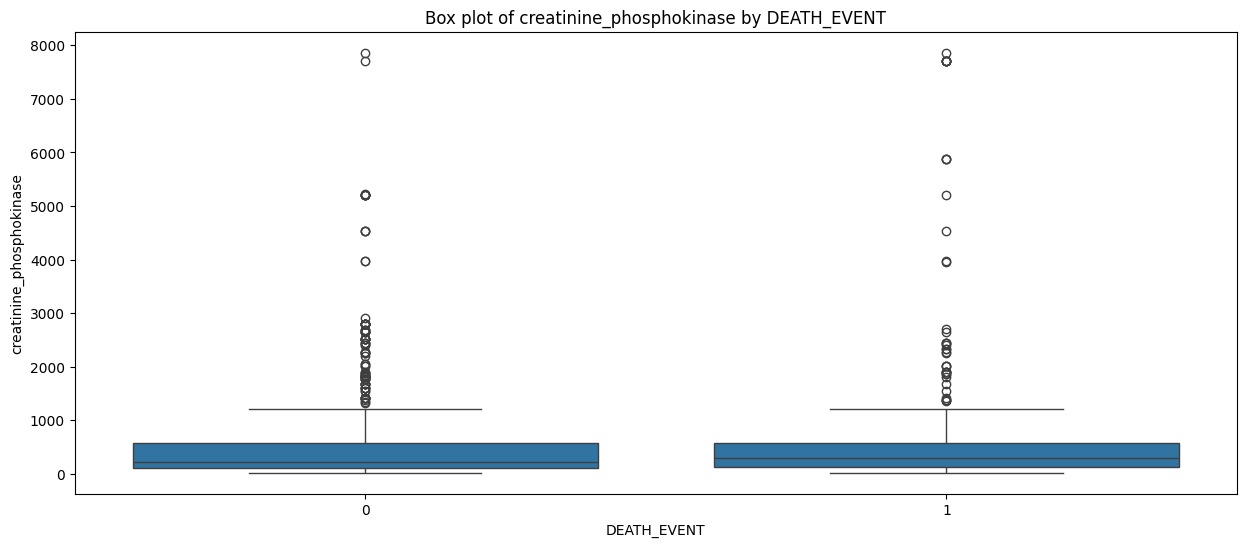

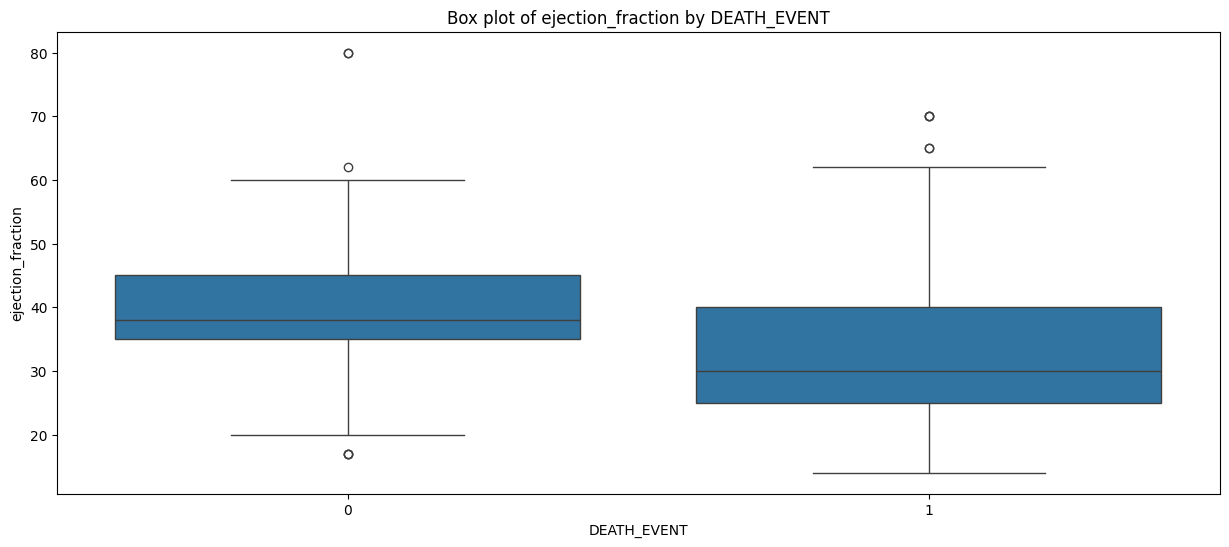

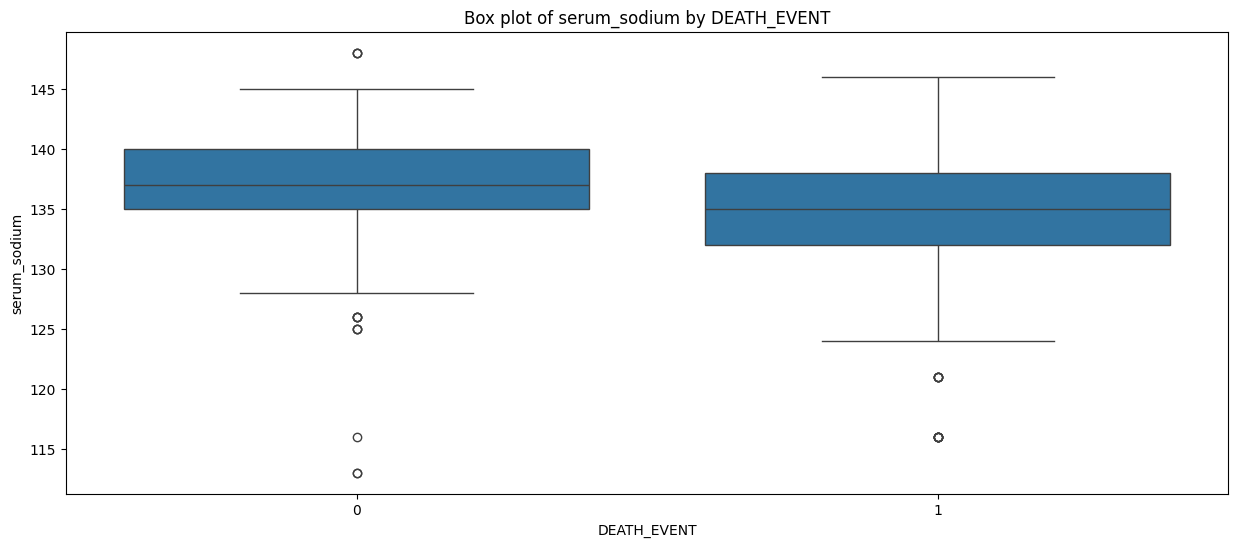

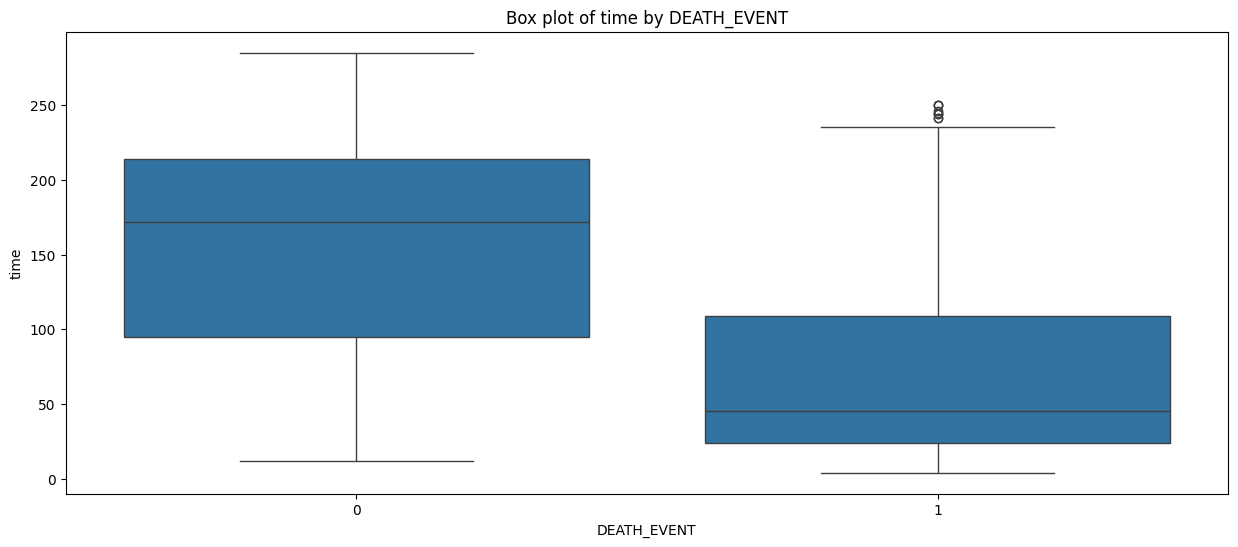

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box plot of {feature} by {target}')
    plt.show()

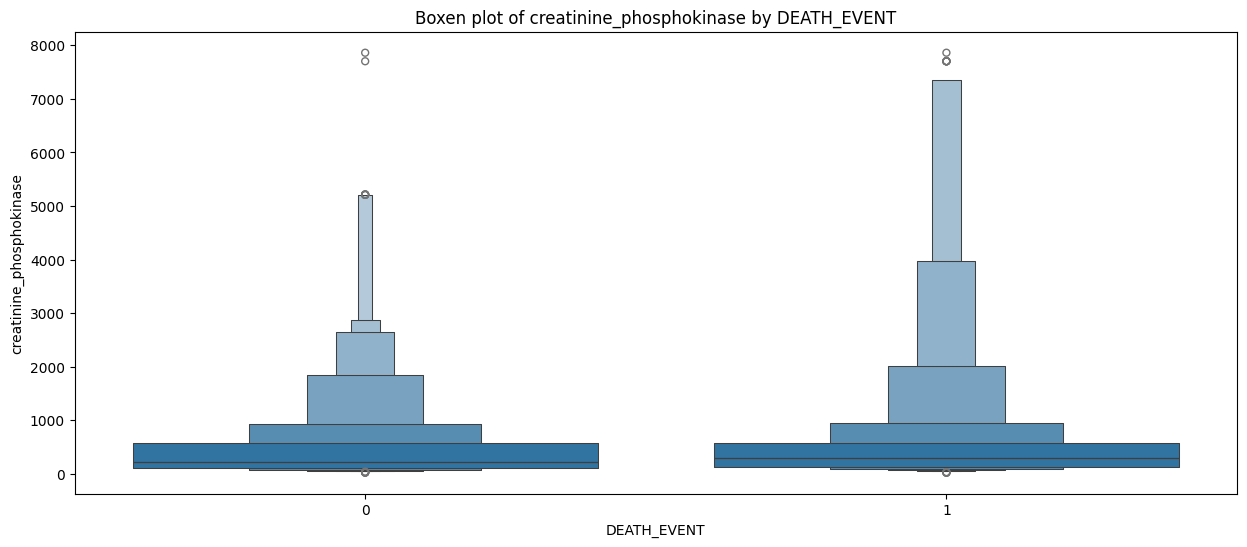

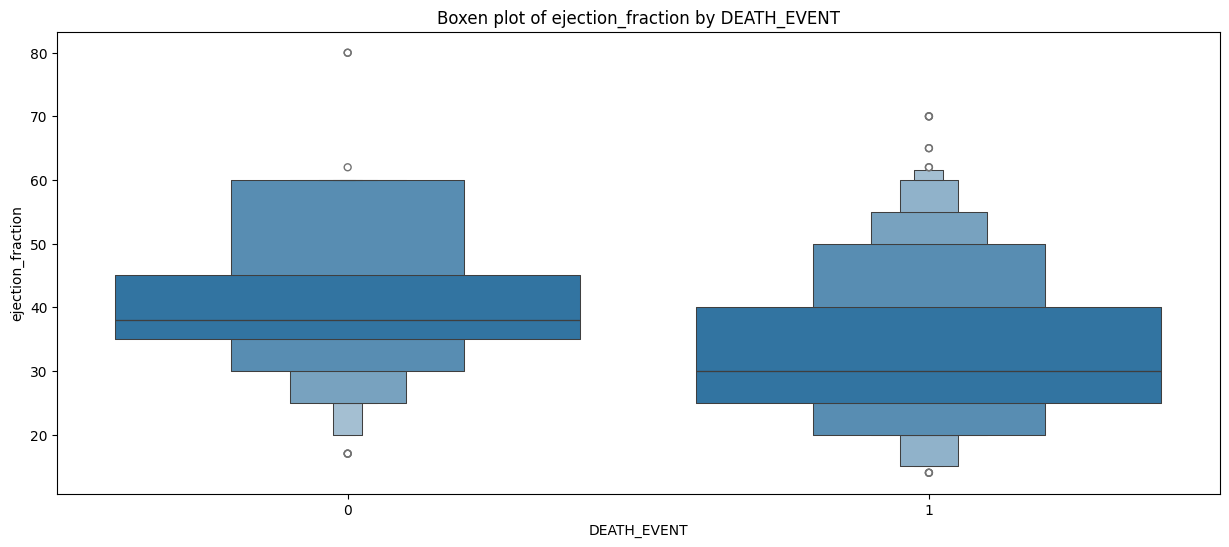

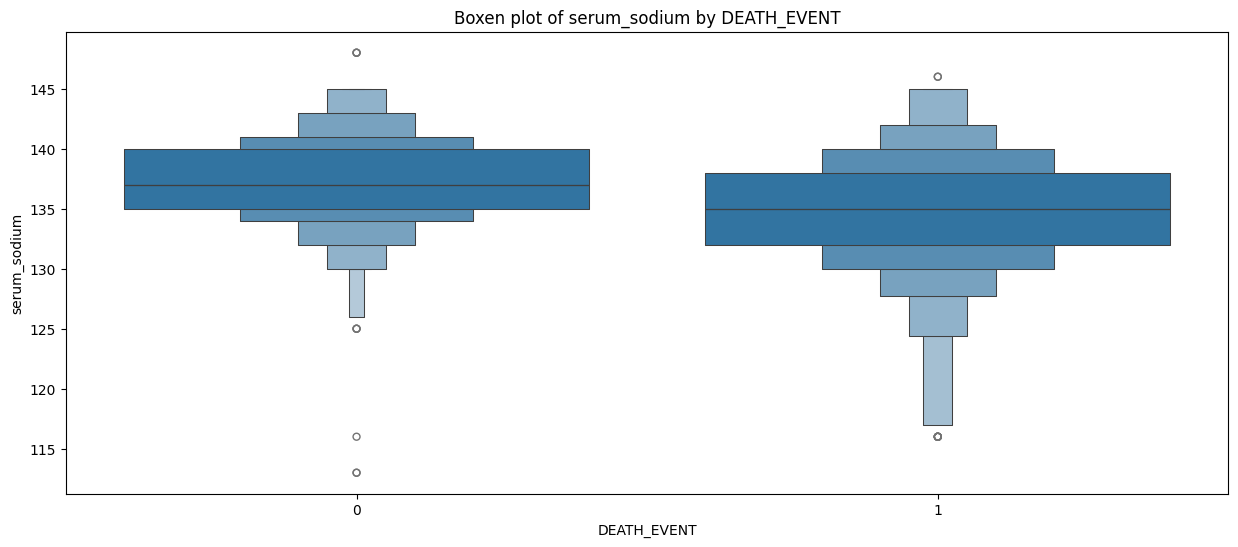

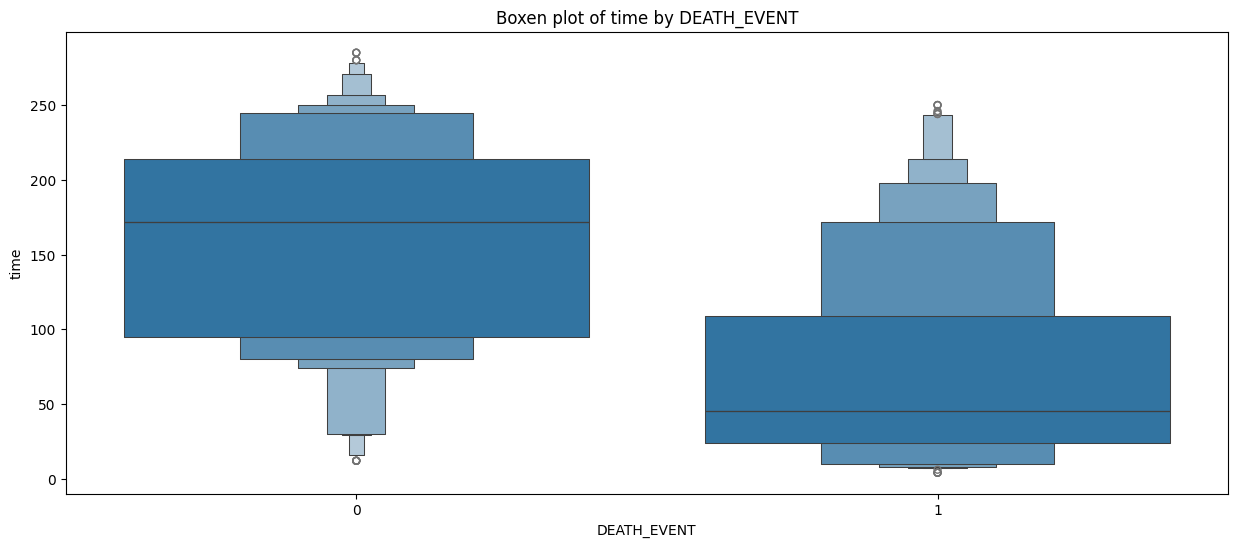

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=target, y=feature, data=df)
    plt.title(f'Boxen plot of {feature} by {target}')
    plt.show()

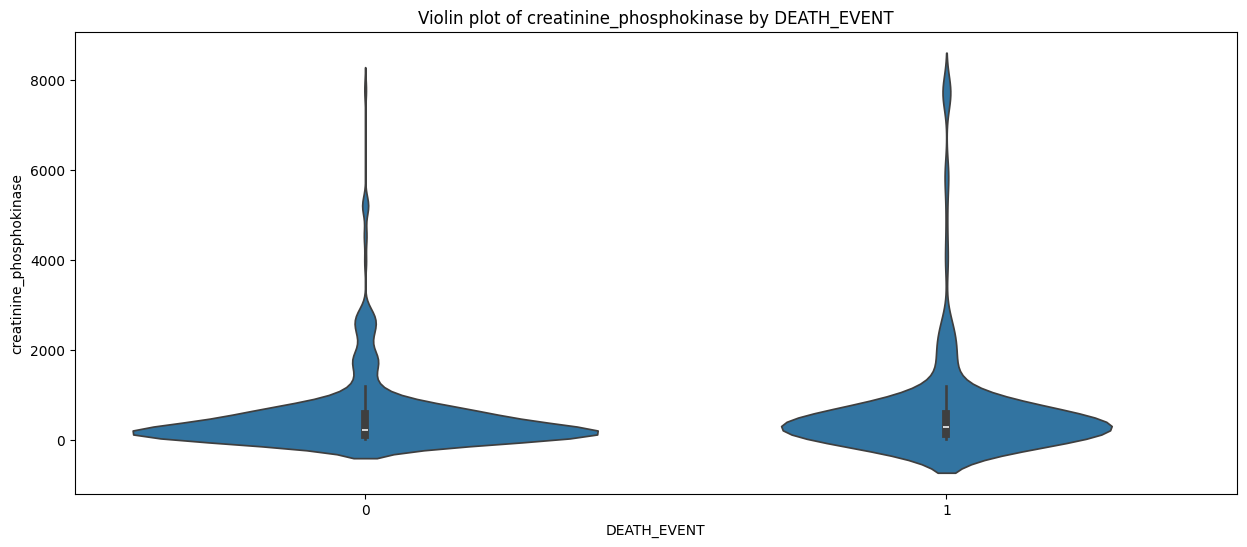

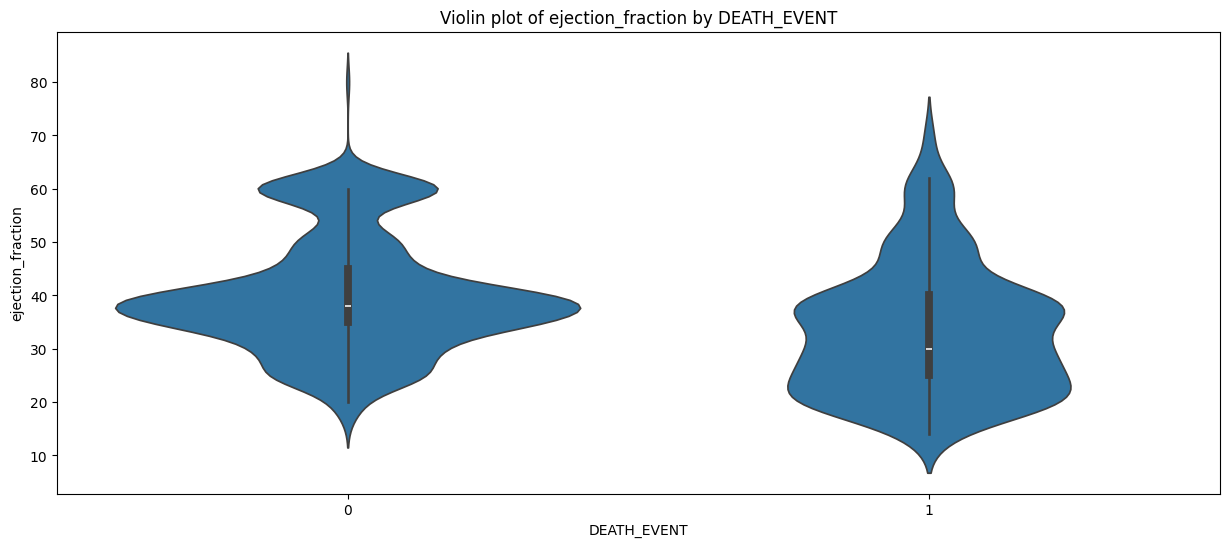

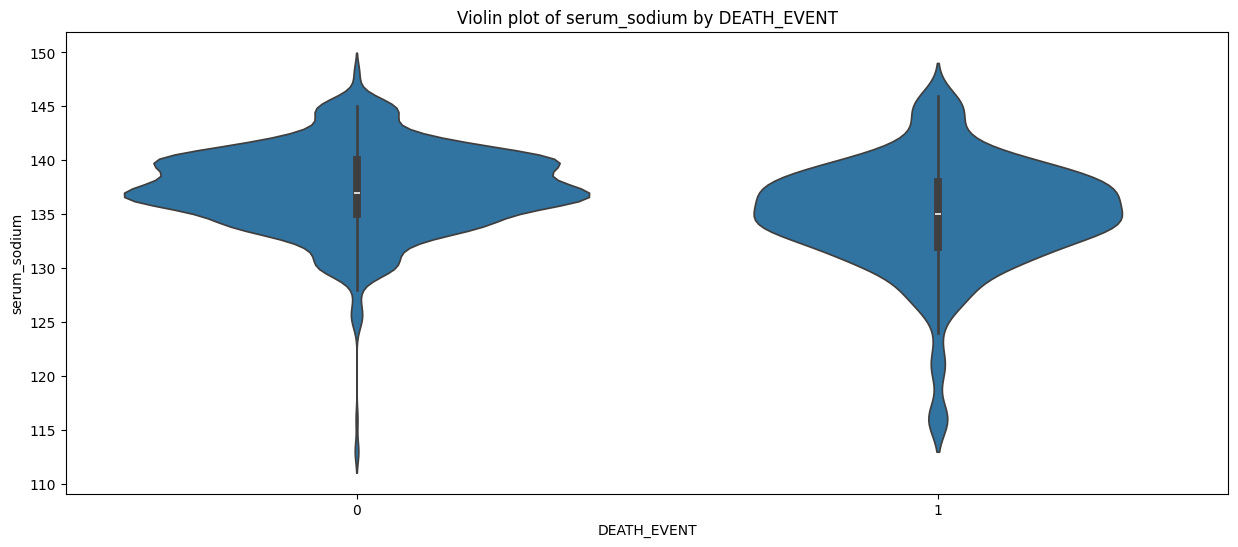

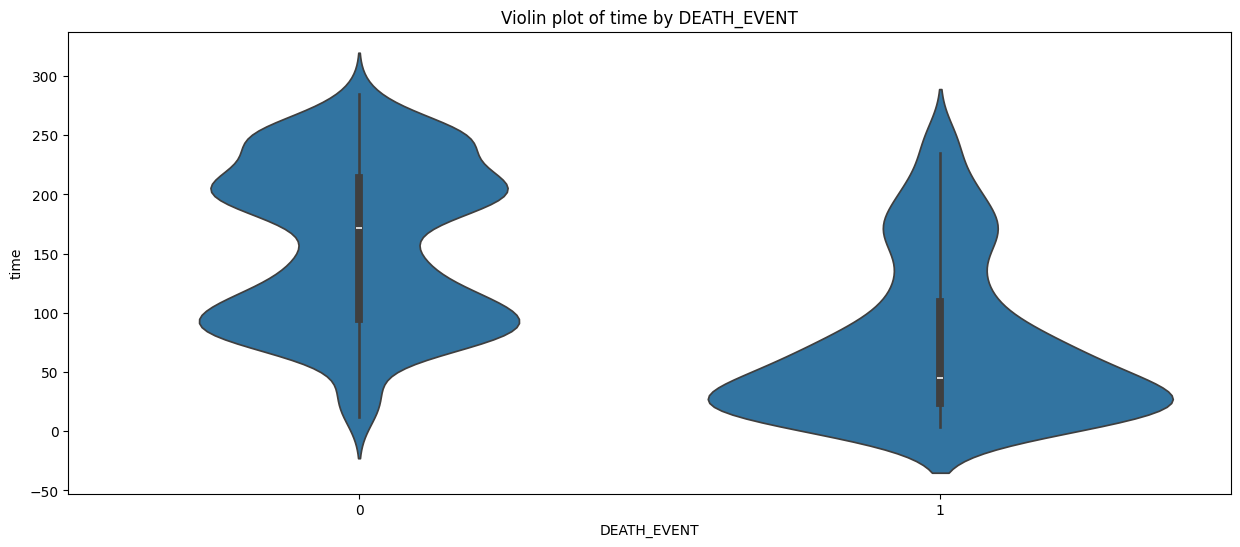

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=target, y=feature, data=df)
    plt.title(f'Violin plot of {feature} by {target}')
    plt.show()

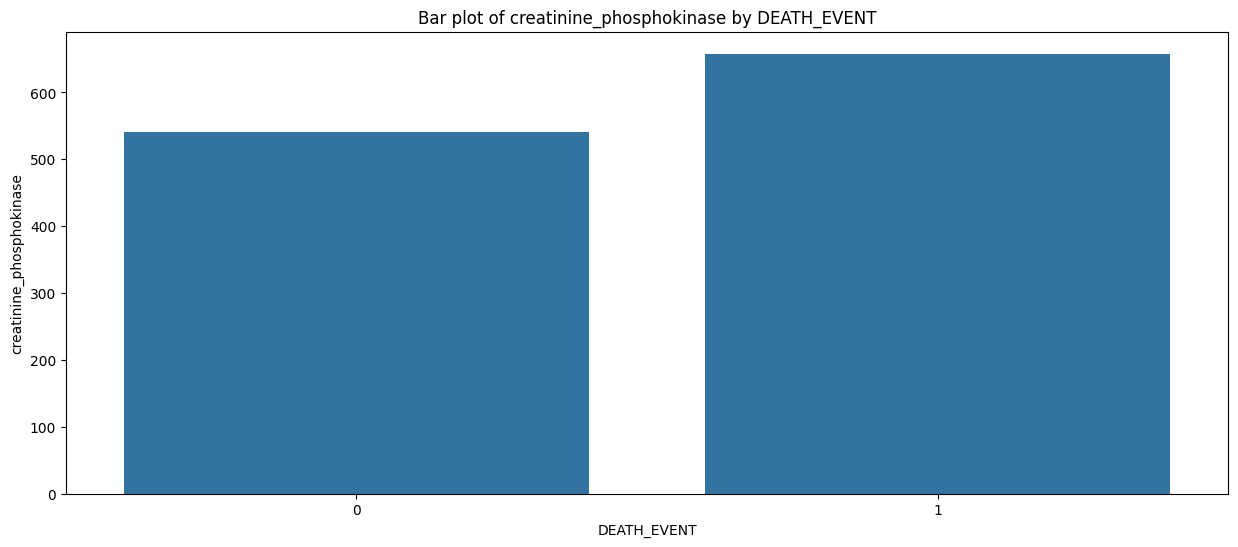

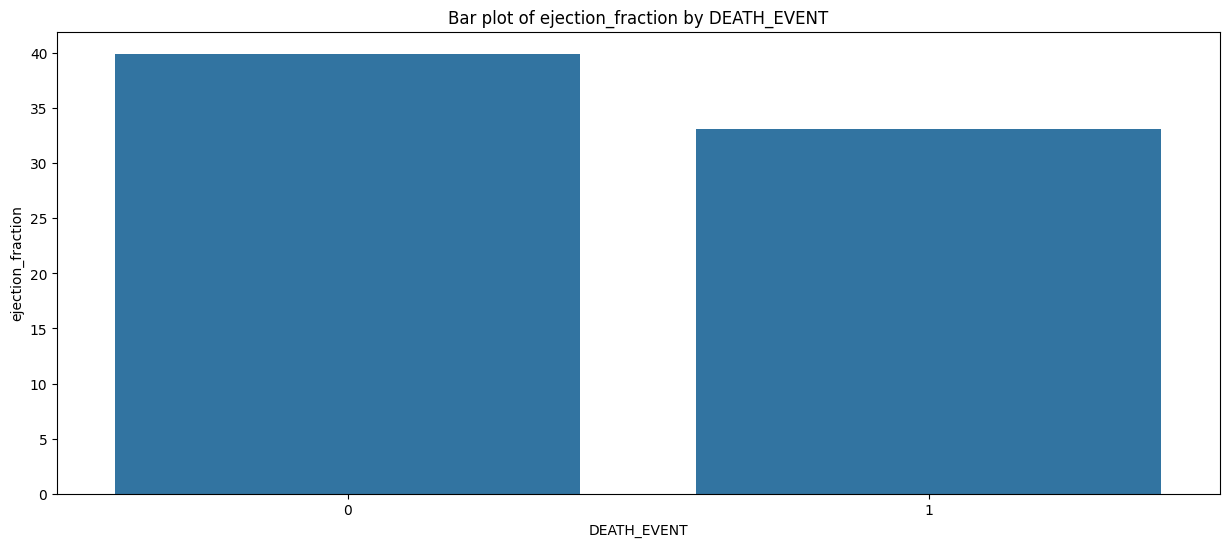

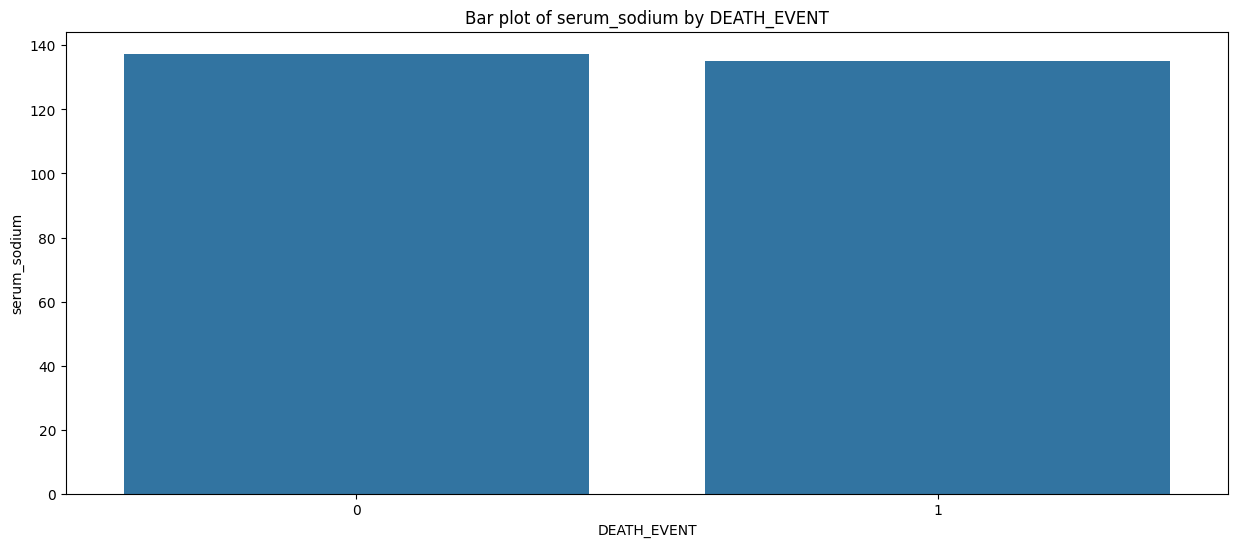

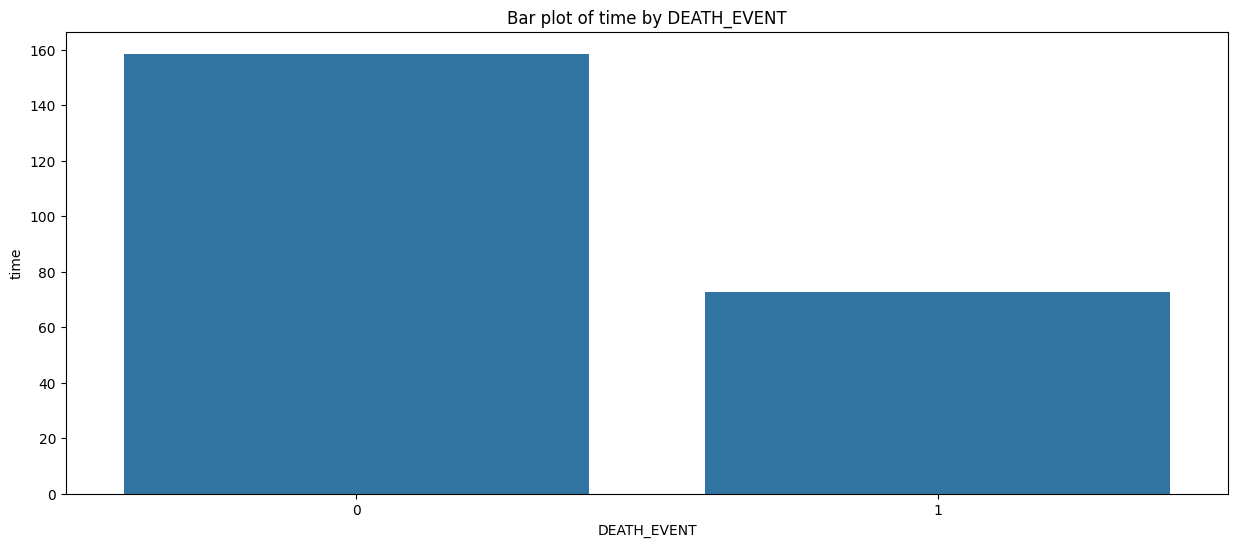

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.barplot(x=target, y=feature, ci = None, data=df)
    plt.title(f'Bar plot of {feature} by {target}')
    plt.show()

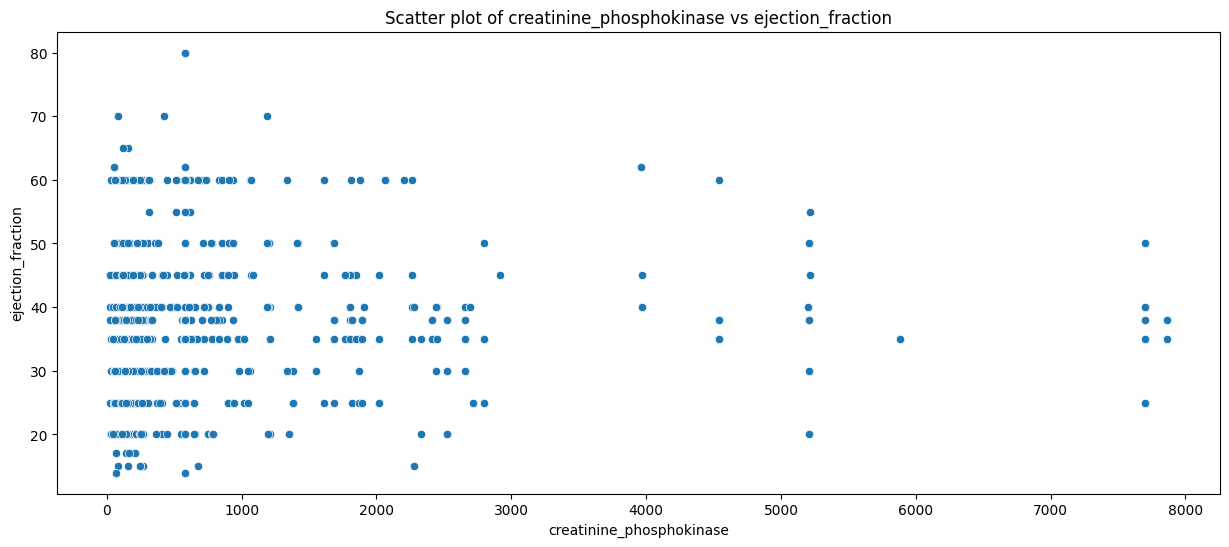

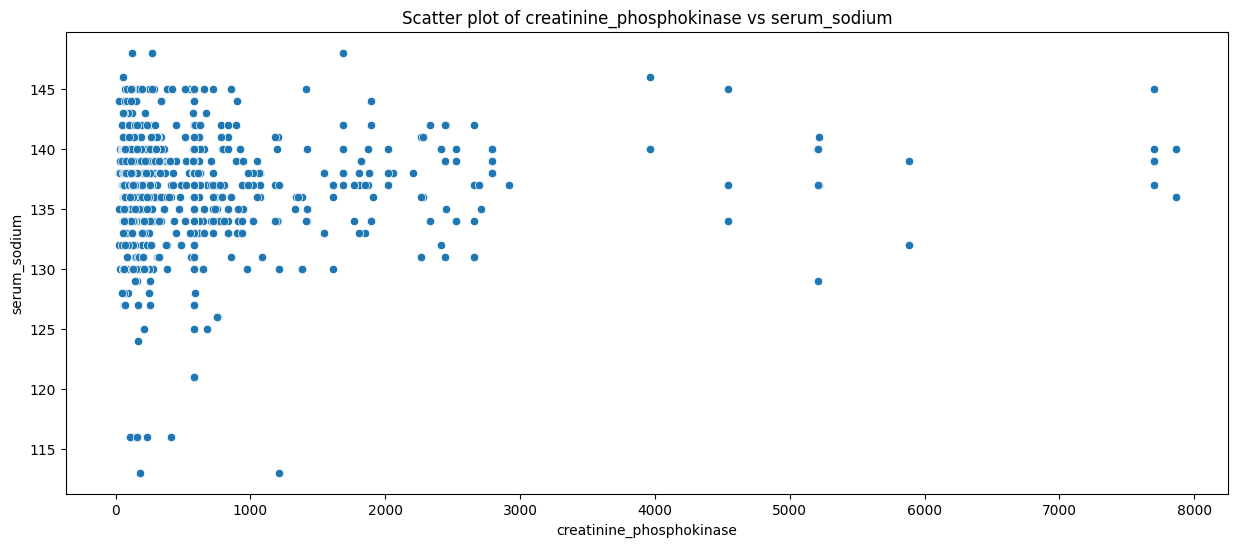

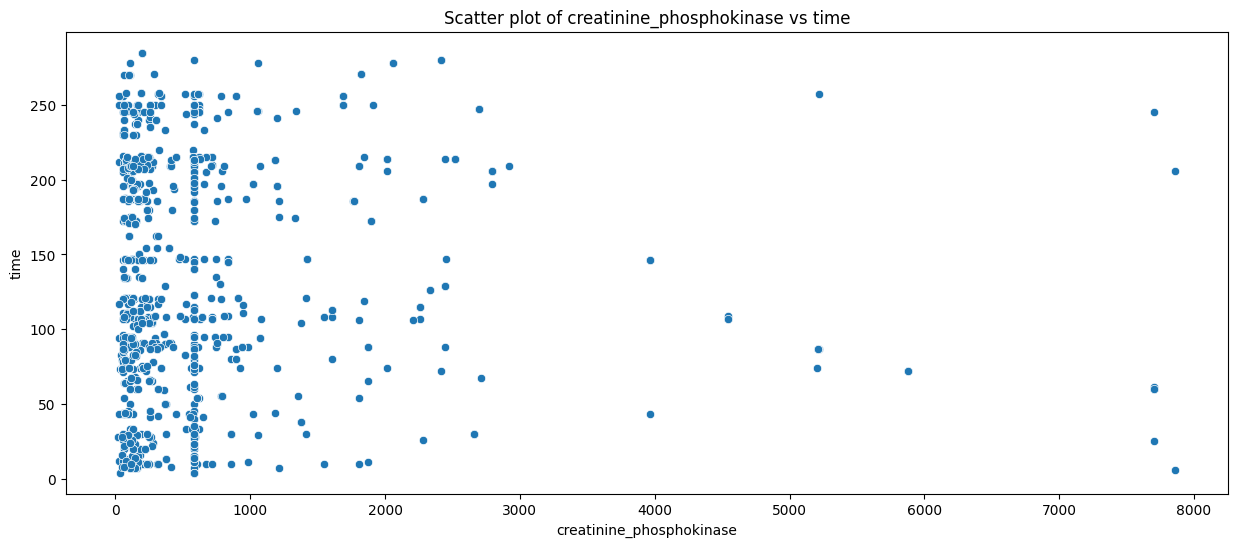

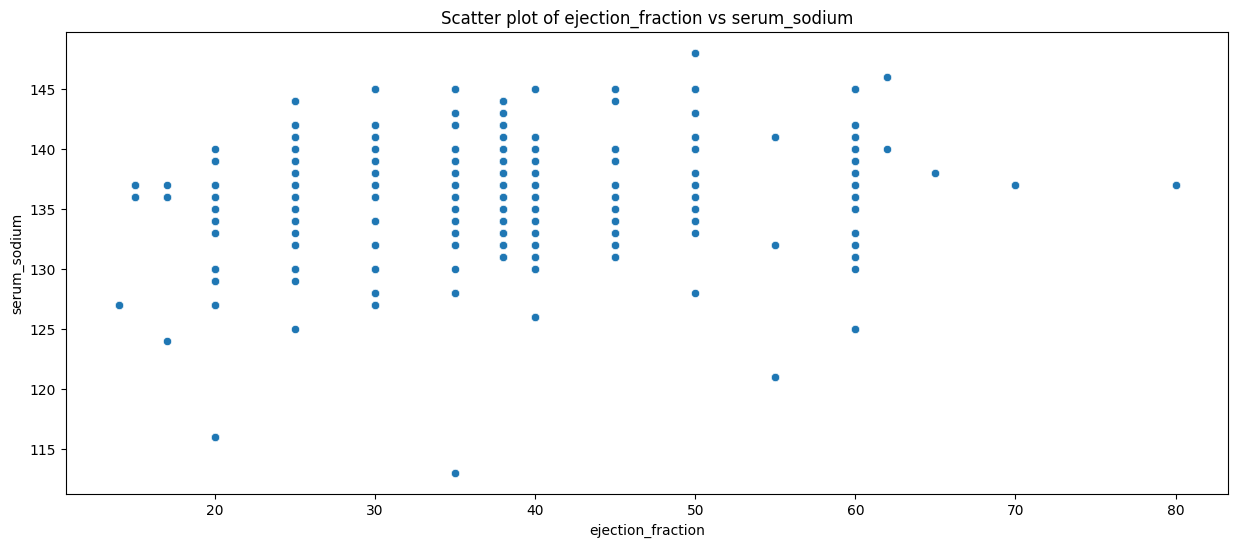

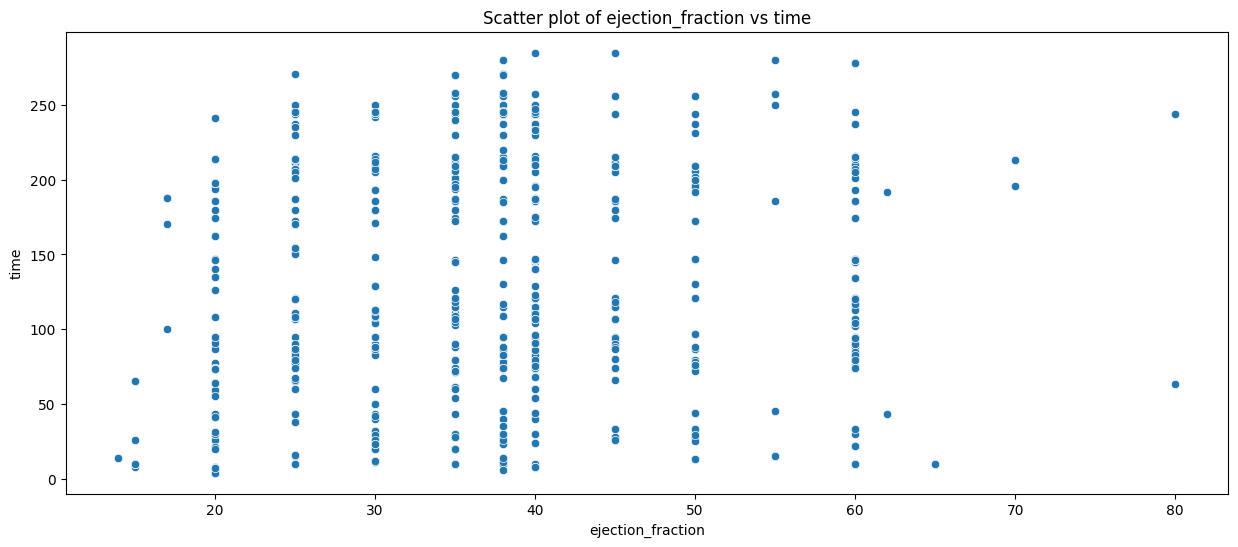

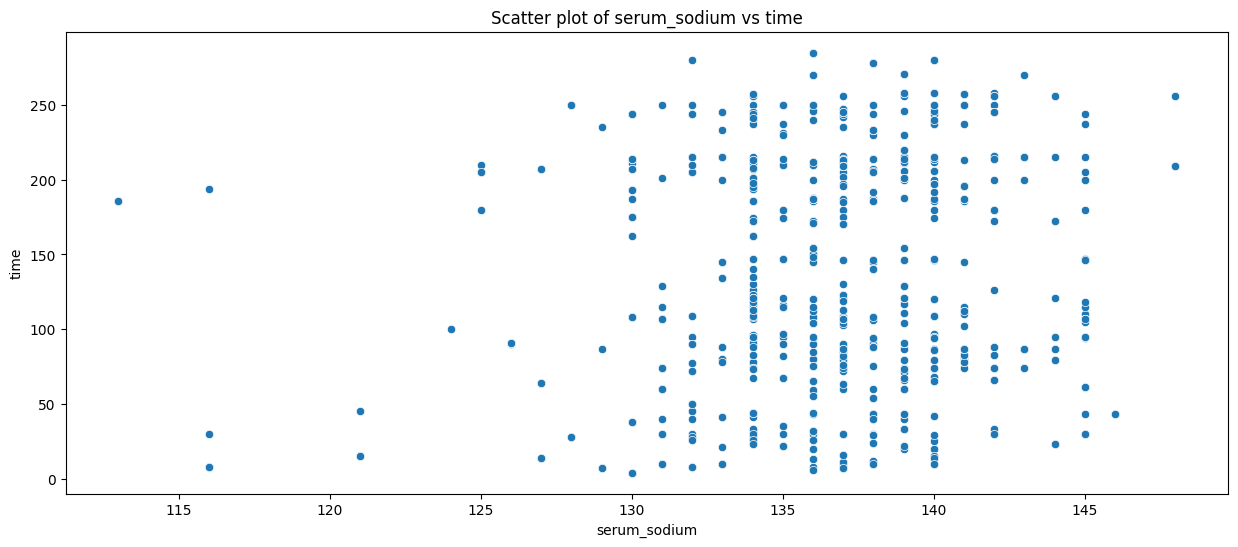

In [ ]:
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous_features[i], y=continuous_features[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()

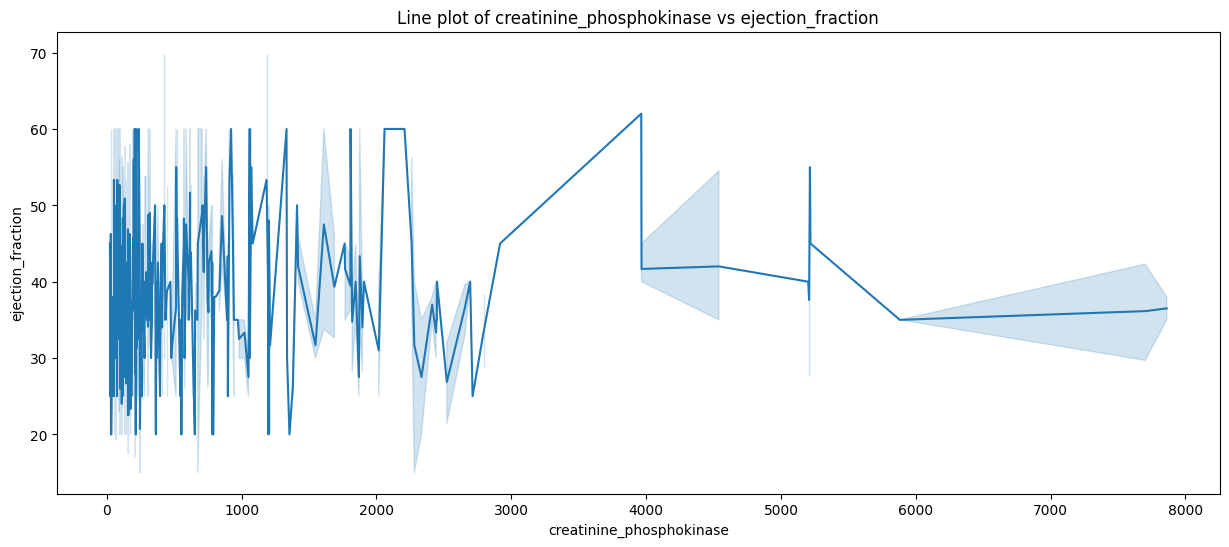

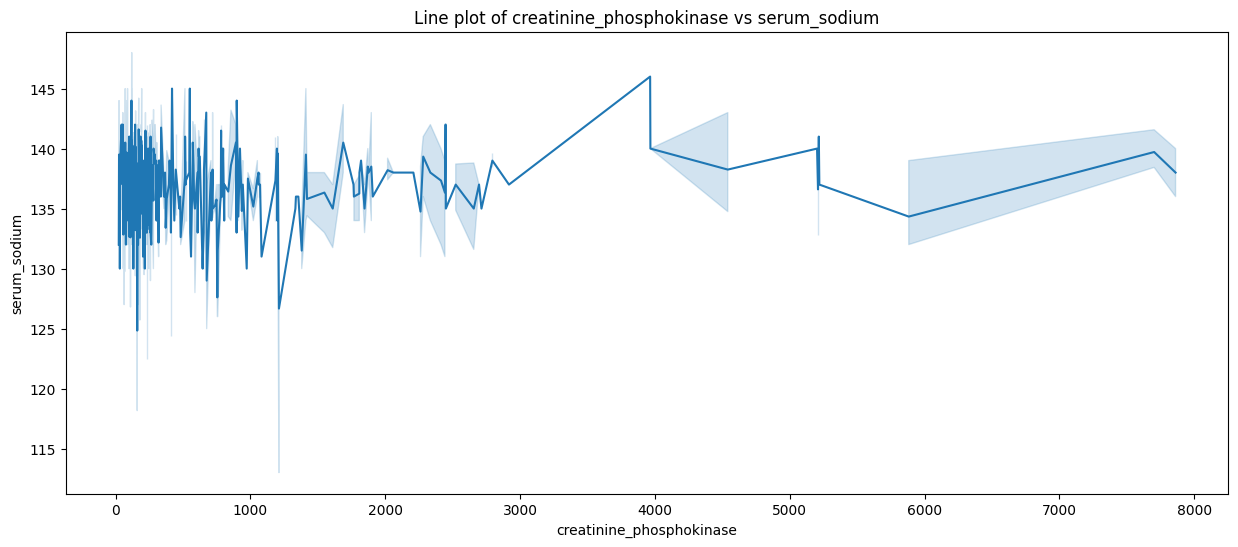

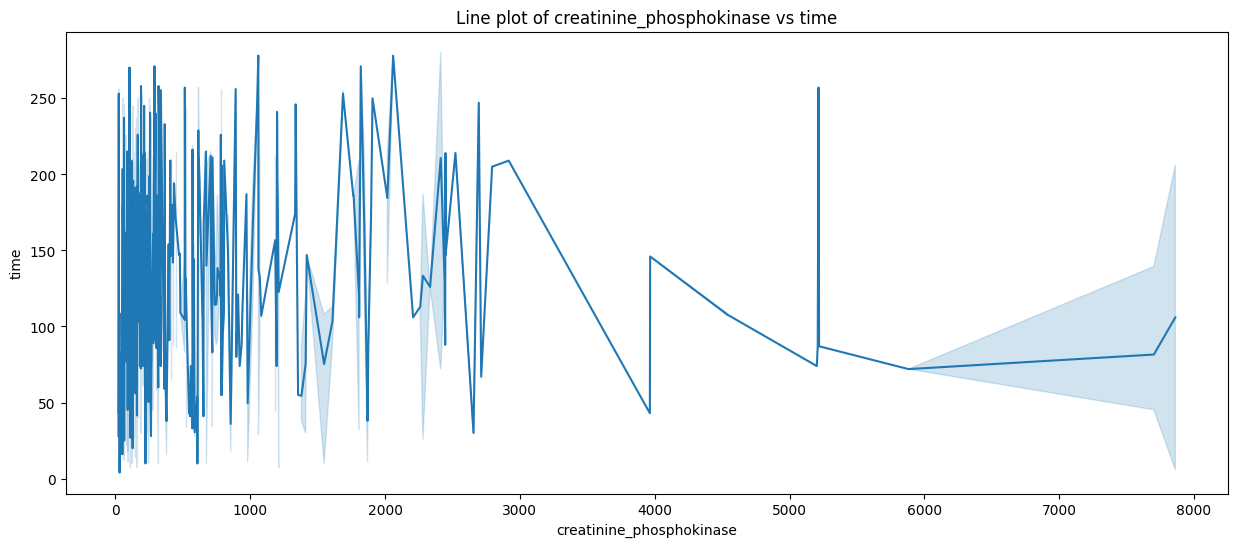

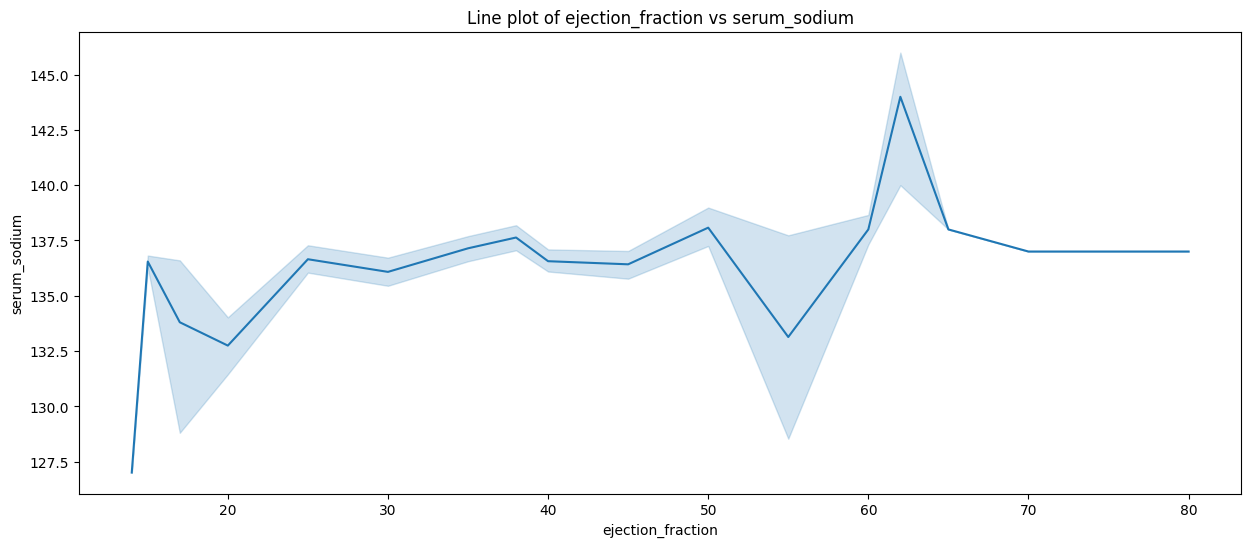

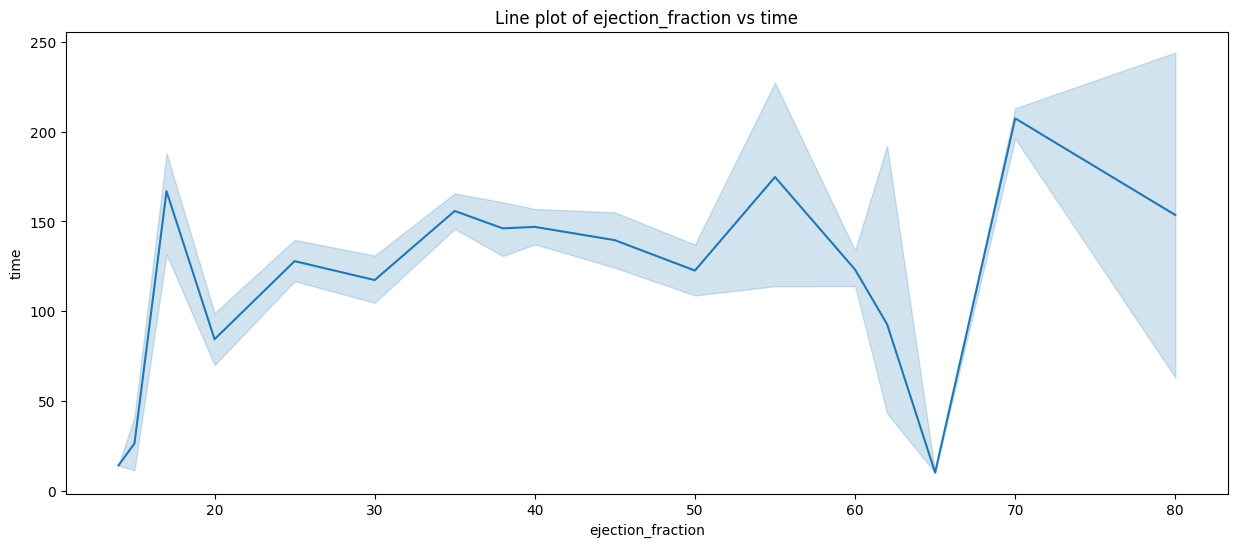

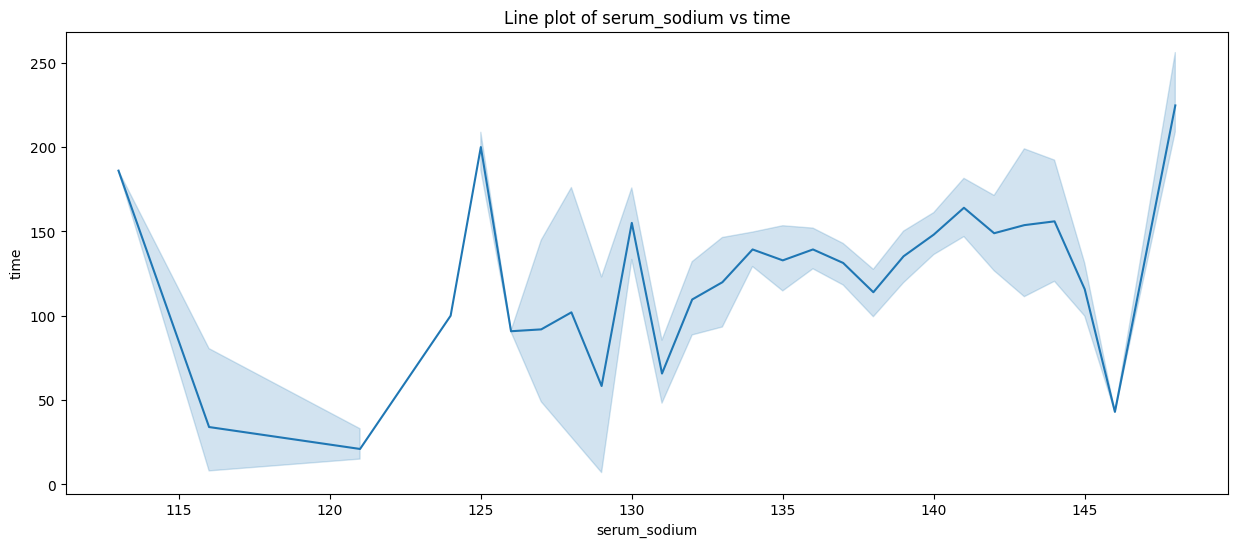

In [ ]:
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous_features[i], y=continuous_features[j], data=df, palette='hls')
        plt.title(f'Line plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


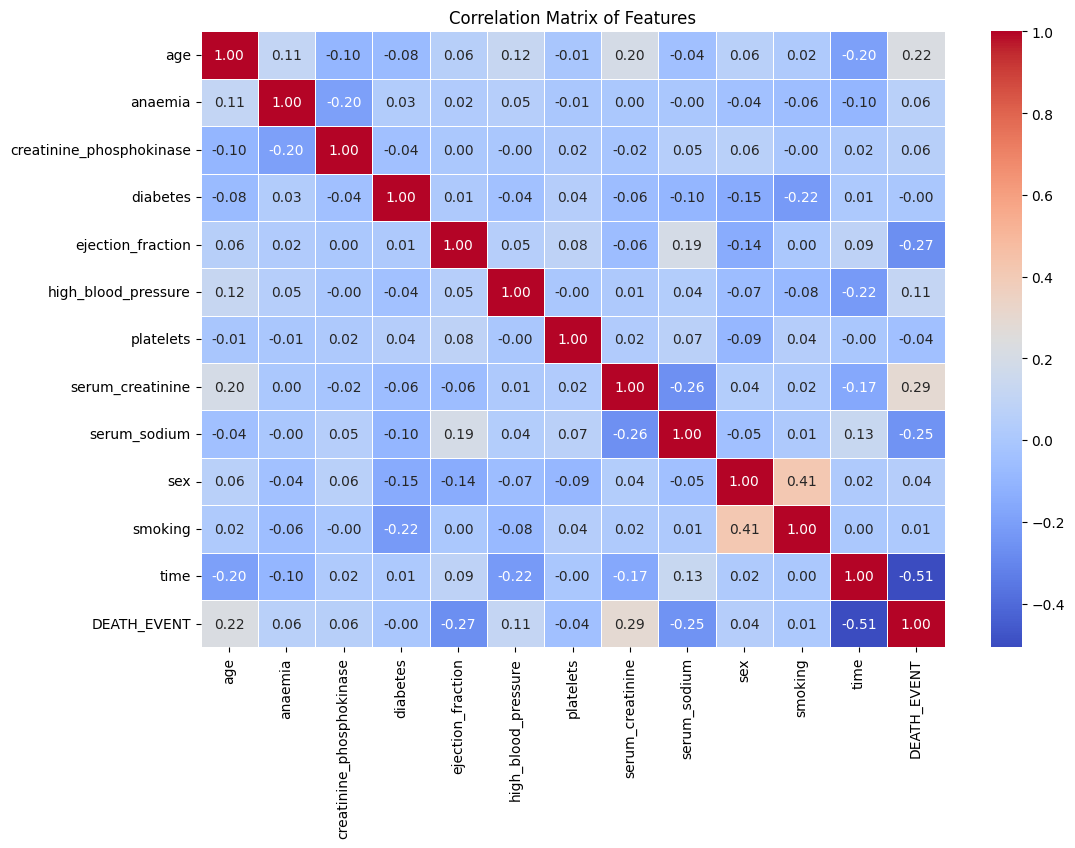

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
correlation_with_target = df.corr()[target]

In [ ]:
correlation_with_target

,DEATH_EVENT
age,0.224602
anaemia,0.063510
creatinine_phosphokinase,0.055221
diabetes,-0.001485
ejection_fraction,-0.271767
high_blood_pressure,0.113721
platelets,-0.044523
serum_creatinine,0.290229
serum_sodium,-0.250990
sex,0.044045


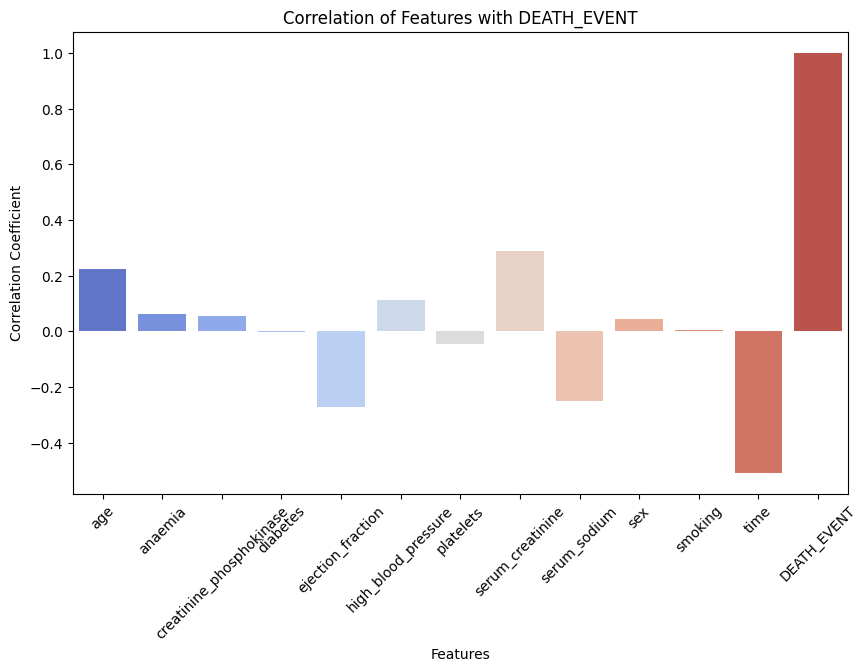

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with DEATH_EVENT')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pivot_table = pd.pivot_table(df, index='anaemia', columns='smoking', values='DEATH_EVENT', aggfunc='mean')

In [ ]:
pivot_table

smoking,0,1
anaemia,,
0,0.280353,0.256637
1,0.316703,0.366667


In [ ]:
pivot_table_max = pd.pivot_table(df, index='anaemia', columns='smoking', values='DEATH_EVENT', aggfunc='max')

In [ ]:

pivot_table_max

smoking,0,1
anaemia,,
0,1,1
1,1,1


In [ ]:
pivot_table_age = pd.pivot_table(df, index='anaemia', columns='smoking', values='age', aggfunc='mean')

In [ ]:
pivot_table_age

smoking,0,1
anaemia,,
0,58.825607,60.362832
1,61.964579,61.775928


In [ ]:
pivot_table_age = pd.pivot_table(df, index='DEATH_EVENT', columns='anaemia', values='age', aggfunc='mean')

In [ ]:
pivot_table_age

anaemia,0,1
DEATH_EVENT,,
0,57.870445,59.941734
1,63.254054,65.897802


In [ ]:
cross_tabulation_table = pd.crosstab(df['DEATH_EVENT'], df['anaemia'])
print("Cross-tabulation of 'DEATH_EVENT' and 'anaemia':\n", cross_tabulation_table)

Cross-tabulation of 'DEATH_EVENT' and 'anaemia':
 anaemia        0    1
DEATH_EVENT          
0            494  429
1            185  212


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df_new.drop('DEATH_EVENT', axis=1)
y = df_new['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.7348484848484849


In [ ]:
y_pred_train = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7840909090909091


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9507575757575758


In [ ]:
y_pred_train = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9128787878787878


In [ ]:
y_pred_train = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6287878787878788


In [ ]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.6193181818181818


In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7083333333333334


In [ ]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7651515151515151


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled[['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']])
X_test_scaled = scaler.transform(X_test[['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']])

In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_scaled, y_train_resampled)

SVC(kernel='linear')

In [ ]:
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7575757575757576


In [ ]:
y_pred_train = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7872628726287263


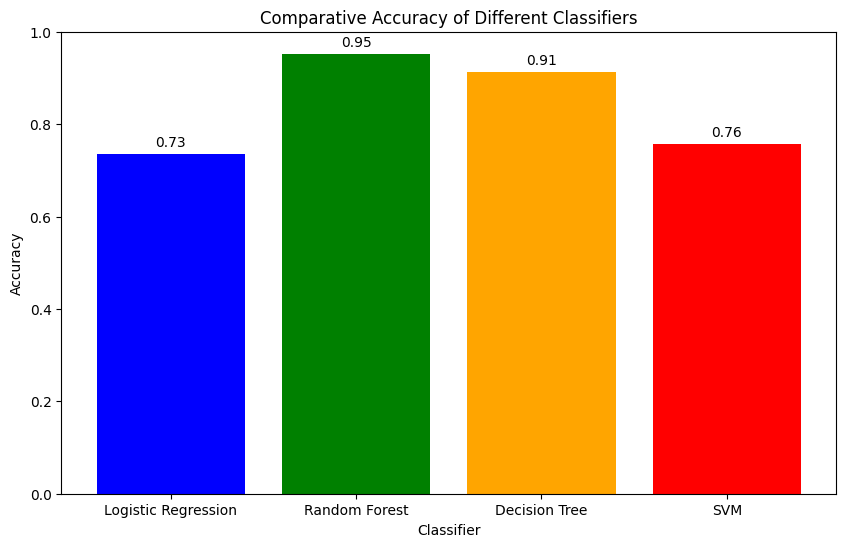

In [ ]:
classifiers = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']

accuracies = [log_reg_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])

plt.title('Comparative Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn import tree

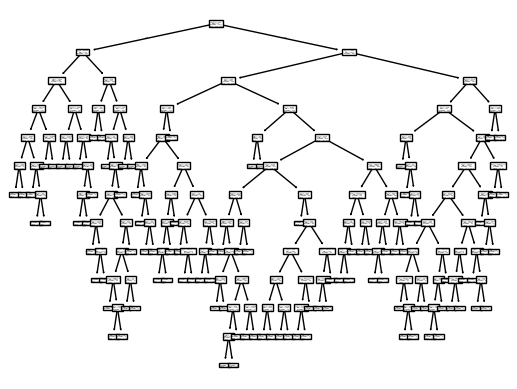

In [ ]:
tree.plot_tree(dt_model)
plt.show()

In [ ]:
import pickle
with open('rf_model_heart.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
import sys

python_version = sys.version

numpy_version = np.__version__

pandas_version = pd.__version__

print(f"Python version: {python_version}")
print(f"NumPy version: {numpy_version}")
print(f"Pandas version: {pandas_version}")


Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
NumPy version: 1.26.4
Pandas version: 2.2.2


In [ ]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.6.1
